# Data: Fairfax County Fire and Rescue Department call data and patient demographics 
Team: Fairfax Consultants

In [1]:
print("Hello Fairfax Consultants, Welcome Aboard")
#pip install nbconvert #or conda install nbconvert  #to save the notebook as .pdf
#nbconvert[webpdf]
#pip install pyppeteer
#https://github.com/jgm/pandoc/releases/tag/2.18

Hello Fairfax Consultants, Welcome Aboard


In [2]:
#Check the version
!jupyter --version
!python --version

Selected Jupyter core packages...
IPython          : 8.3.0
ipykernel        : 6.9.1
ipywidgets       : 7.6.5
jupyter_client   : 7.2.2
jupyter_core     : 4.10.0
jupyter_server   : 1.17.1
jupyterlab       : 3.3.2
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.3.0
notebook         : 6.4.11
qtconsole        : 5.3.1
traitlets        : 5.1.1
Python 3.8.11


In [3]:
#Import libraries
import os

import pandas as pd
#pd.set_option('display.max_rows', None)

import numpy as np
import math
#Import Viz libraries


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Altair can be installed, along with the example datasets in vega_datasets, using:$ pip install altair vega_datasets
#https://altair-viz.github.io/gallery/index.html

import altair as alt #pip install altair (from anaconda Powershell)
from vega_datasets import data # pip install vega_datasets/ #Only to use data from vegas data sets or else can be ignored

#To avoid MaxRowsError: in big data sets with altair
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('json')
#pip install altair_data_server
#alt.data_transformers.enable('data_server')
# Optional in Jupyter Notebook: requires an up-to-date vega nbextension.
#alt.renderers.enable('notebook') #$ pip install vega #https://altair-viz.github.io/user_guide/display_frontends.html

#pip install altair_viewer
#alt.renderers.enable('altair_viewer') 
#pip install altair_saver #to save interactive charts with interactive elements

#alt.renderers.enable('svg') #renders the chart as a static svg image within a Jupyter notebook.
#chart.save('chart.html', embed_options={'renderer':'svg'}) #o change to svg rendering, use the embed_options as such

DataTransformerRegistry.enable('json')

In [4]:
#Import all sheet by index
# # Set current working directory
# os.chdir("C:\\Users\\matth\\OneDrive\\Documents\\GMU\\DAEN 690\\Sponsor Files")
#df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3])

df = pd.read_excel("E:\DAEN_690\Data\RawData_GMU_Summer2022_SecondaryImpression.xlsx", sheet_name = None)#[0,1,2,3])

# # reading csv file and at a same time using converters attribute which will remove extra space
# df = pd.read_csv('\\student_data.csv', converters={'Name': str.strip(),
#                                                 'Blood Group' : str.strip(),
#                                                 'Gender' : str.strip() } )

#df = pd.read_excel("E:\DAEN_690\Data\Copy of RawData_GMU_Summer2022_SecondaryImpression.xlsx", sheet_name = None)#[0,1,2,3]) #in laptop
#df = pd.read_excel("E:\DAEN_690\Data\Copy of RawData_GMU_Summer2022.xlsx", sheet_name = None)#[0,1,2,3]) #in laptop
#pd.ExcelFile()
print(df)

{'Patient Demographics':         Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Female        Female   
1                               

In [5]:
#Imported as Dictionary, view keys or values
print(df.keys())
print(df.values())
print(df['Patient Demographics']) #view 

dict_keys(['Patient Demographics', 'sepsis', 'STEMI', 'stroke'])
dict_values([        Patient_ID_Internal   PatientRace     PatientEthnicity  \
0                   1014525  HI Native/PI  Non-Hispanic/Latino   
1                   1625597         Asian  Non-Hispanic/Latino   
2                    818385         White  Non-Hispanic/Latino   
3                   1726959      Black/AA  Non-Hispanic/Latino   
4                   1319018         White  Non-Hispanic/Latino   
...                     ...           ...                  ...   
186860              1627319         Asian  Non-Hispanic/Latino   
186861              1016261      Black/AA  Non-Hispanic/Latino   
186862              1226587         White  Non-Hispanic/Latino   
186863              1326193         White  Non-Hispanic/Latino   
186864              1201794         White  Non-Hispanic/Latino   

                         Patient_Race_List_Raw PatientSex PatientGender  \
0       Native Hawaiian/Other Pacific Islander     Fem

In [6]:
#convert Dicationary to Data Frames
PatDemo = pd.DataFrame(df['Patient Demographics'])
SEPSIS = pd.DataFrame(df['sepsis'])
STEMI = pd.DataFrame(df['STEMI'])
STROKE = pd.DataFrame(df['stroke'])

#View Headings
print("\n PatDemo:\n",PatDemo.head(1))
print("\n SEPSIS:\n",SEPSIS.head(1))
print("\n STEMI:\n",STEMI.head(1))
print("\n STROKE:\n",STROKE.head(1))


 PatDemo:
    Patient_ID_Internal   PatientRace     PatientEthnicity  \
0              1014525  HI Native/PI  Non-Hispanic/Latino   

                    Patient_Race_List_Raw PatientSex PatientGender  \
0  Native Hawaiian/Other Pacific Islander     Female        Female   

  Patient_Gender_Raw  IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  
0             Female                  0            0          50-59  

 SEPSIS:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   

  EmergencyDepartmentDiagnosis  \
0                          NaN   

                                   HospitalDiagnosi

In [7]:
#View Columns for each data frame

print("\n PatDemo:\n",PatDemo.columns)
print("\n SEPSIS:\n",SEPSIS.columns )
print("\n STEMI:\n",STEMI.columns )
print("\n STROKE:\n",STROKE.columns)


 PatDemo:
 Index(['Patient_ID_Internal', 'PatientRace', 'PatientEthnicity',
       'Patient_Race_List_Raw', 'PatientSex', 'PatientGender',
       'Patient_Gender_Raw', 'IsJuvenileUnder18', 'IsSenior65+',
       'AgeGroup_HIPAA'],
      dtype='object')

 SEPSIS:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'SepsisStatus', 'qSOFA',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STEMI:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis'],
      dtype='object')

 STROKE:
 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'StrokeStatus', 'Speech', 'FacialDroop',
       'PronatorArmDrift', 'LargeV

Patient_ID_Internal         0
PatientRace              5782
PatientEthnicity         5782
Patient_Race_List_Raw    5782
PatientSex               5780
PatientGender            5780
Patient_Gender_Raw       5780
IsJuvenileUnder18           0
IsSenior65+                 0
AgeGroup_HIPAA           5786
dtype: int64


<AxesSubplot:>

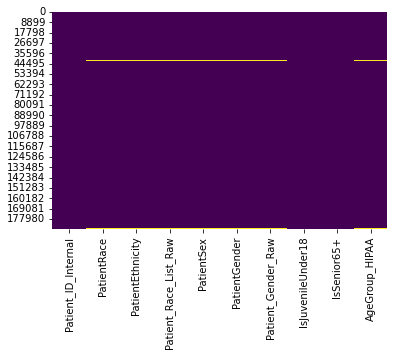

In [8]:
#Count Nulls
print(PatDemo.isnull().sum())
#With the help of heatmap, we can see the amount of data that is missing from the attribute
sns.heatmap(PatDemo.isnull(),cbar=False,cmap='viridis')

In [9]:
#Check if any columns or values are duplicated.

print("\n If any column header redundant?:",PatDemo.columns.duplicated())
print("\n Sex & Gender Duplicated?   : ",PatDemo['PatientSex'].equals(PatDemo['PatientGender']))
print("\n Race Duplicated?           : ",PatDemo['Patient_Race_List_Raw'].equals(PatDemo['PatientRace']))
print("\n Gender and GRaw Duplicated?: ",PatDemo['Patient_Gender_Raw'].equals(PatDemo['PatientGender']))
print("\n unique values in PatientGender column :\n",PatDemo['PatientGender'].unique())
print("\n unique values in PatientSex column :\n",PatDemo['PatientSex'].unique())

#PatDemo.columns
#even if logicaltest says not duplicated, it is okay to delete 'PatientSex',  'Patient_Gender_Raw', 'Patient_Race_List_Raw'


 If any column header redundant?: [False False False False False False False False False False]

 Sex & Gender Duplicated?   :  False

 Race Duplicated?           :  False

 Gender and GRaw Duplicated?:  False

 unique values in PatientGender column :
 ['Female' 'Male' nan 'Other' 'Tr M>F' 'Tr F>M' 'Non-binary']

 unique values in PatientSex column :
 ['Female' 'Male' nan 'Other']


In [10]:
#drop reduntant columns
PatDemo.drop(["Patient_Race_List_Raw", "Patient_Gender_Raw",'PatientGender'], axis =1,  inplace =True)
PatDemo.head(2)

,Patient_ID_Internal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA
0,1014525,HI Native/PI,Non-Hispanic/Latino,Female,0,0,50-59
1,1625597,Asian,Non-Hispanic/Latino,Female,0,1,80-89


In [11]:
#rename patient demographic column 'Patient_ID_Internal' to 'PtIDInternal' 
#to sync with the rest of the data sets,STEMI,SEPSIS and STROKE
PatDemo.rename(columns = {'Patient_ID_Internal':'PtIDInternal'}, inplace = True)
PatDemo.head(2)

,PtIDInternal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA
0,1014525,HI Native/PI,Non-Hispanic/Latino,Female,0,0,50-59
1,1625597,Asian,Non-Hispanic/Latino,Female,0,1,80-89


In [12]:
#Count of unique values in each rows for each column
print("No.of.unique values in each column :\n", PatDemo.nunique(axis=0))

No.of.unique values in each column :
 PtIDInternal         186865
PatientRace               7
PatientEthnicity          2
PatientSex                3
IsJuvenileUnder18         2
IsSenior65+               2
AgeGroup_HIPAA           11
dtype: int64


In [13]:
#read unique values, how many patients under particular age group

#print("\n unique values: ", PatDemo['AgeGroup_HIPAA'].unique() )
#print("\n Count of unique values: ", len(PatDemo['AgeGroup_HIPAA'].unique()))
#print("\n Count of unique values: ", PatDemo.AgeGroup_HIPAA.nunique())
#print("\n Count of each unique values: ", list(PatDemo.AgeGroup_HIPAA.value_counts()))

#Convert AgeGroup_HIPAA to string to get rid of datetime format value
PatDemo['AgeGroup_HIPAA']= PatDemo['AgeGroup_HIPAA'].astype('str')
#print("\n sorted age group:",sorted(PatDemo['AgeGroup_HIPAA'].unique()))
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())


 Count of each unique values:  AgeGroup_HIPAA
20-29                  16537
2022-10-19 00:00:00     8909
30-39                  19237
40-49                  17861
50-59                  22475
60-69                  24507
70-79                  26567
80-89                  26102
90+                    12476
Under 10                6403
Unk                        5
nan                     5786
Name: PtIDInternal, dtype: int64


In [14]:
#check the data types for rest of the columns
print(PatDemo.info())
print("\n details: \n",PatDemo['AgeGroup_HIPAA'].describe())
# PatDemo.dtypes
# PatDemo.index
# PatDemo.shape
# PatDemo.memory_usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186865 entries, 0 to 186864
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   PtIDInternal       186865 non-null  int64 
 1   PatientRace        181083 non-null  object
 2   PatientEthnicity   181083 non-null  object
 3   PatientSex         181085 non-null  object
 4   IsJuvenileUnder18  186865 non-null  int64 
 5   IsSenior65+        186865 non-null  int64 
 6   AgeGroup_HIPAA     186865 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.0+ MB
None

 details: 
 count     186865
unique        12
top        70-79
freq       26567
Name: AgeGroup_HIPAA, dtype: object


In [15]:
#Replace '2022-10-19 00:00:00' with 10-19 and nan with Unk, my logic is even NULL is also unknown in a way

PatDemo["AgeGroup_HIPAA"] = PatDemo["AgeGroup_HIPAA"].replace({'2022-10-19 00:00:00':'10_19','20-29':'20_29','50-59':'50_59', 
                                                               '80-89':'80_89','70-79':'70_79','40-49':'40_49','Under 10':'<10', 
                                                               '60-69':'60_69','30-39':'30_39', 'nan':'Unk'})

#sorted(PatDemo["AgeGroup_HIPAA"].unique())
print("\n Count of each unique values: ", PatDemo.groupby('AgeGroup_HIPAA').PtIDInternal.nunique())
# Total=sum(PatDemo['AgeGroup_HIPAA'].value_counts(dropna=True))
# Total
# PatDemo.AgeGroup_HIPAA.value_counts(dropna=True)


 Count of each unique values:  AgeGroup_HIPAA
10_19     8909
20_29    16537
30_39    19237
40_49    17861
50_59    22475
60_69    24507
70_79    26567
80_89    26102
90+      12476
<10       6403
Unk       5791
Name: PtIDInternal, dtype: int64


In [16]:
#Binarize the boolen values to feed the ML Algorithms
#PatDemo.columns
#Get the boolean values for Patients Sex
#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]
PatDemo_Bool = pd.get_dummies(PatDemo, columns=['PatientRace', 'PatientEthnicity', 'PatientSex','AgeGroup_HIPAA']) #, drop_first=True) #Since there's only two values male or female.
PatDemo_Bool
PatDemo_Bool.columns

Index(['PtIDInternal', 'IsJuvenileUnder18', 'IsSenior65+',
       'PatientRace_AK Native/AI', 'PatientRace_Asian', 'PatientRace_Black/AA',
       'PatientRace_HI Native/PI', 'PatientRace_None Listed',
       'PatientRace_TMR', 'PatientRace_White',
       'PatientEthnicity_Hispanic/Latino',
       'PatientEthnicity_Non-Hispanic/Latino', 'PatientSex_Female',
       'PatientSex_Male', 'PatientSex_Other', 'AgeGroup_HIPAA_10_19',
       'AgeGroup_HIPAA_20_29', 'AgeGroup_HIPAA_30_39', 'AgeGroup_HIPAA_40_49',
       'AgeGroup_HIPAA_50_59', 'AgeGroup_HIPAA_60_69', 'AgeGroup_HIPAA_70_79',
       'AgeGroup_HIPAA_80_89', 'AgeGroup_HIPAA_90+', 'AgeGroup_HIPAA_<10',
       'AgeGroup_HIPAA_Unk'],
      dtype='object')

In [17]:
#Lets drop redundant columns:
PatDemo_Bool.drop(['PatientSex_Male','IsJuvenileUnder18','IsSenior65+'],axis =1,  inplace =True)
#rename patient demographic column 'Patient_ID_Internal' to 'PtIDInternal'
PatDemo_Bool.rename(columns = {'PatientSex_Female':'PatientSex_FM'}, inplace = True)
print("\n", PatDemo_Bool.columns)
print("\n", PatDemo_Bool.head())


 Index(['PtIDInternal', 'PatientRace_AK Native/AI', 'PatientRace_Asian',
       'PatientRace_Black/AA', 'PatientRace_HI Native/PI',
       'PatientRace_None Listed', 'PatientRace_TMR', 'PatientRace_White',
       'PatientEthnicity_Hispanic/Latino',
       'PatientEthnicity_Non-Hispanic/Latino', 'PatientSex_FM',
       'PatientSex_Other', 'AgeGroup_HIPAA_10_19', 'AgeGroup_HIPAA_20_29',
       'AgeGroup_HIPAA_30_39', 'AgeGroup_HIPAA_40_49', 'AgeGroup_HIPAA_50_59',
       'AgeGroup_HIPAA_60_69', 'AgeGroup_HIPAA_70_79', 'AgeGroup_HIPAA_80_89',
       'AgeGroup_HIPAA_90+', 'AgeGroup_HIPAA_<10', 'AgeGroup_HIPAA_Unk'],
      dtype='object')

    PtIDInternal  PatientRace_AK Native/AI  PatientRace_Asian  \
0       1014525                         0                  0   
1       1625597                         0                  1   
2        818385                         0                  0   
3       1726959                         0                  0   
4       1319018                    

#SEPSIS_Data Cleaning and Merge with Patients Demographics

In [18]:
#View Header and count null

print("\n header:\n",SEPSIS.head(2))

print("\n count null before merge:\n", SEPSIS.isnull().sum())



 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None                                                NaN   

                        EmergencyDepartmentDiagnosis  \
0                                                NaN   
1  Presence of urogenital implants (Z96.0), "Urin...   

                                   HospitalDiagnosis  
0  Acute respiratory failure with hypoxia (J96.01...  
1  Presence of urogenital implan

In [19]:
#Check if any columns or values are duplicated.
#SEPSIS['EmergencyDepartmentDiagnosis'].unique()

print("\n If any column header redundant?:",SEPSIS.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",SEPSIS['EmergencyDepartmentDiagnosis'].equals(SEPSIS['HospitalDiagnosis']))


print("\n Primary and Secondary Impression Duplicated?: ",SEPSIS['PrimaryImpression'].equals(SEPSIS['SecondaryImpression']))


# print("\n Race Duplicated?           : ",SEPSIS['Patient_Race_List_Raw'].equals(SEPSIS['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",SEPSIS['Patient_Gender_Raw'].equals(SEPSIS['PatientGender']))



 If any column header redundant?: [False False False False False False False False False]

 Emergency & Hospital have same values?   :  False

 Primary and Secondary Impression Duplicated?:  False


In [20]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
SEPSISclean = SEPSIS

#SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].astype(str).fillna('') + SEPSISclean["HospitalDiagnosis"].astype(str).fillna('')
SEPSISclean["overall_diagnosis"] = SEPSISclean["EmergencyDepartmentDiagnosis"].fillna('') + SEPSISclean["HospitalDiagnosis"].fillna('')

SEPSISclean["Merged_Impression"] = SEPSISclean["PrimaryImpression"].fillna('') + SEPSISclean["SecondaryImpression"].fillna('')

##drop reduntant columns
#SEPSIS.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",SEPSISclean.head(2))

print("\n count null after merge:\n", SEPSISclean.isna().sum())

#SEPSISclean.head(10)


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None                                                NaN   

                        EmergencyDepartmentDiagnosis  \
0                                                NaN   
1  Presence of urogenital implants (Z96.0), "Urin...   

                                   HospitalDiagnosis  \
0  Acute respiratory failure with hypoxia (J96.01...   
1  Presence of urogenital impl

In [21]:
#SEPSISclean.dtypes
print("\n count NaN after merge:\n",SEPSISclean[SEPSISclean == ''].count())
print("\n count null after merge:\n", SEPSISclean.isna().sum())
#SEPSISclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                         0
PtIDInternal                      0
PrimaryImpression                 0
SecondaryImpression               0
isOutcomeFacility                 0
SepsisStatus                      0
qSOFA                             0
EmergencyDepartmentDiagnosis      0
HospitalDiagnosis                 0
overall_diagnosis               776
Merged_Impression                 0
dtype: int64

 count null after merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0
SecondaryImpression                0
isOutcomeFacility                  0
SepsisStatus                       0
qSOFA                            774
EmergencyDepartmentDiagnosis    1277
HospitalDiagnosis                891
overall_diagnosis                  0
Merged_Impression                  0
dtype: int64


In [22]:
##Unique Values

print("\n unique values for Overall Daiagnosis:\n\n", SEPSISclean["overall_diagnosis"].unique())
print("\n\n unique values for Merged_Impression:\n\n", SEPSISclean["Merged_Impression"].unique())
print("\n\n unique values for EmergencyDepartmentDiagnosis:\n\n", SEPSISclean["EmergencyDepartmentDiagnosis"].unique())
print("\n\n unique values for HospitalDiagnosis:\n\n", SEPSISclean["HospitalDiagnosis"].unique())
print("\n\n unique values for PrimaryImpression:\n\n", SEPSISclean["PrimaryImpression"].unique())
print("\n\n unique values for SecondaryImpression:\n\n", SEPSISclean["SecondaryImpression"].unique())
print("\n Unique qSOFA values: \n",SEPSISclean['qSOFA'].unique())
print("\n Unique Sepsis Statusvalues: \n",SEPSISclean['SepsisStatus'].unique())

##Unique Codes	A41.9, (A41.89)

# Infectious -Sepsis (A41.9)
# "Sepsis, unspecified organism (A41.9)"
#"Other specified sepsis (A41.89)"--Only In Emergency Department Diagnosis
# "Severe sepsis with septic shock (R65.21), 
# "Severe sepsis without septic shock (R65.20)"



 unique values for Overall Daiagnosis:

 ['Acute respiratory failure with hypoxia (J96.01), "Other viral pneumonia (J12.89)", "COVID-19 (U07.1)"'
 'Presence of urogenital implants (Z96.0), "Urinary tract infection, site not specified (N39.0)", "Sepsis, unspecified organism (A41.9)"Presence of urogenital implants (Z96.0), "Urinary tract infection, site not specified (N39.0)", "Sepsis, unspecified organism (A41.9)"'
 'ST elevation (STEMI) myocardial infarction of unspecified site (I21.3), "Hypotension, unspecified (I95.9)", "Bradycardia, unspecified (R00.1)"Severe sepsis with septic shock (R65.21), "Sepsis, unspecified organism (A41.9)", "Vascular disorder of intestine, unspecified (K55.9)", "ST elevation (STEMI) myocardial infarction of unspecified site (I21.3)", "Bradycardia, unspecified (R00.1)", "Hypotension, unspecified (I95.9)"'
 ...
 'Sepsis, unspecified organism (A41.9), "Primary adrenocortical insufficiency (E27.1)", "Hypotension, unspecified (I95.9)"'
 'Sepsis, unspecified org

In [23]:
# df = pd.DataFrame({'A': ['Mouse', 'dOg', 'cat', '23', np.NaN]})
# df['B']=np.where(df.A.str.contains('og', na =False, case = False),1,0)
# print(df)

# #Results: 
# #        A  B
# # 0  Mouse  0
# # 1    dOg  1
# # 2    cat  0
# # 3     23  0
# # 4    NaN  0

#The logic here is Nan's are 0 or doesn't contains sepsis
SEPSISclean.to_excel("E:\DAEN_690\Data\SEPSISclean.xlsx",sheet_name = "SEPSIS",index=False)


In [24]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not
##The logic here is Nan's are 0 or doesn't contains sepsis , whether to consider it as a legit or not? it will affect the 
##Triage Rates. Or Else overall_diagnosis with nan values has to be removed.

SEPSISclean["sepsis_outcome"] = np.where(SEPSISclean["overall_diagnosis"].str.contains("Sepsis", na=False, case=False), 1,
                                np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.89", na=False, case=False), 1,
                                np.where(SEPSISclean["overall_diagnosis"].str.contains("A41.9", na=False, case=False), 1, 0)))


print("\n\n sepsis outcome binarized: \n\n",SEPSISclean.head())
#binarize ProviderImpression
SEPSISclean["ProviderImpression"] = np.where(SEPSISclean["Merged_Impression"].str.contains("Sepsis", na=False, case=False), 1,
                                    np.where(SEPSISclean["Merged_Impression"].str.contains("A41.89", na=False, case=False), 1,
                                    np.where(SEPSISclean["Merged_Impression"].str.contains("A41.9", na=False, case=False), 1, 0)))

print("\n\n ProviderImpression binarized: \n\n",SEPSISclean.head())
#Accuracy
SEPSISclean["Accuracy"] = np.where(SEPSISclean["ProviderImpression"] == SEPSISclean["sepsis_outcome"], 1, 0) #Match -1, MisMatch 0
SEPSISclean.head()



 sepsis outcome binarized: 

   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   
2   2020-12       1414144        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   
3   2020-10       1374795                                      Fever (R50.9)   
4   2021-02       1471075            GI/GU - Abdominal Pain/Problem (R10.84)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   
2                                   Weakness (R53.1)                  1   
3                                     Not Applicable                  1   
4                                     Not Applicable                  1   

   SepsisStatus                     

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,SepsisStatus,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,sepsis_outcome,ProviderImpression,Accuracy
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,Notification,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,0,1,0
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,None,NaN,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,1,0,0
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,None,NaN,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,1,0,0
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,None,NaN,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,1,0,0
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,Notification,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,0,0,1


In [25]:
#To find out  if it is Under or Over Triage.
#TRIAGE is the sorting of and allocation of treatment to patients

SEPSISclean["Triage0"] = np.where(((SEPSISclean["ProviderImpression"] == SEPSISclean["sepsis_outcome"])),'Triage','')
SEPSISclean["Triage1"] = np.where(((SEPSISclean["ProviderImpression"] == 1) &  (SEPSISclean["sepsis_outcome"] == 0)),'OverTriage','')
SEPSISclean["Triage2"] = np.where(((SEPSISclean["ProviderImpression"] == 0) &  (SEPSISclean["sepsis_outcome"] == 1)),'UnderTriage','')
SEPSISclean["Triage"] = SEPSISclean["Triage0"].fillna('') + SEPSISclean["Triage1"].fillna('') + SEPSISclean["Triage2"].fillna('')

print('Head: ',SEPSISclean.head())
print('UniqueValue: ',SEPSISclean["Triage"].unique())

Head:    MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2020-11       1393632  Respiratory - Pulmonary Edema Acute Onset (J81.0)   
1   2021-12       1794780                                      Fever (R50.9)   
2   2020-12       1414144        CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)   
3   2020-10       1374795                                      Fever (R50.9)   
4   2021-02       1471075            GI/GU - Abdominal Pain/Problem (R10.84)   

                                 SecondaryImpression  isOutcomeFacility  \
0  Respiratory - Not Otherwise Listed (J98.9), "I...                  1   
1          GI/GU - Nausea (Without Vomiting) (R11.0)                  1   
2                                   Weakness (R53.1)                  1   
3                                     Not Applicable                  1   
4                                     Not Applicable                  1   

   SepsisStatus                                              

In [26]:
#Crete dummies for SepsisStatus for Machine Learning
SEPSISclean_Boolean = pd.get_dummies(SEPSISclean, columns=['SepsisStatus'])#, drop_first=True)
SEPSISclean_Boolean

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,sepsis_outcome,ProviderImpression,Accuracy,Triage0,Triage1,Triage2,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,0,1,0,,OverTriage,,OverTriage,0,0,1
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,NaN,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,1,0,0,,,UnderTriage,UnderTriage,0,1,0
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,NaN,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,1,0,0,,,UnderTriage,UnderTriage,0,1,0
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,NaN,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,1,0,0,,,UnderTriage,UnderTriage,0,1,0
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,0,0,1,Triage,,,Triage,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2020-10,1384971,Infectious - Disease Unspecified (B99.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Pure hypercholesterolemia, unspecified (E78.00...","Pure hypercholesterolemia, unspecified (E78.00...",Infectious - Disease Unspecified (B99.9)Not Ap...,0,0,1,Triage,,,Triage,0,0,1
2106,2021-02,1465727,Infectious - Sepsis (A41.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Sepsis, unspecified organism (A41.9), ""Primary...","Sepsis, unspecified organism (A41.9), ""Primary...",Infectious - Sepsis (A41.9)Not Applicable,1,1,1,Triage,,,Triage,1,0,0
2107,2020-11,1406840,Infectious - Pneumonia (J18.9),"Infectious - Pneumonia (J18.9), ""Infectious - ...",0,Respiratory Rate greater than 22,NaN,NaN,,Infectious - Pneumonia (J18.9)Infectious - Pne...,0,1,0,,OverTriage,,OverTriage,0,0,1
2108,2021-09,1673023,Infectious - Influenza (Flu Like Symptoms) (J11),CV - Hypotension (I95.9),1,"Altered Mental Status (GCS <15), Systolic BP l...","Sepsis, unspecified organism (A41.9), ""Severe ...","COVID-19 (U07.1), ""Acute respiratory failure w...","Sepsis, unspecified organism (A41.9), ""Severe ...",Infectious - Influenza (Flu Like Symptoms) (J1...,1,0,0,,,UnderTriage,UnderTriage,1,0,0


In [27]:
#To iter through the values/ categories list nan are replaced with Unknown

SEPSISclean_Boolean["qSOFA"] = SEPSISclean_Boolean["qSOFA"].fillna('Unknown')
print("\n\n SEPSIS_Boolean_QSOFA:\n\n", SEPSISclean_Boolean['qSOFA'].unique())
SEPSISclean["qSOFA"] = SEPSISclean["qSOFA"].fillna('Unknown')
print("\n\n SEPSISClean_QSOFA:\n\n", SEPSISclean['qSOFA'].unique())


#Create dummies for qSOFA

# SEPSISclean = pd.get_dummies(SEPSISclean, columns=['qSOFA'])#, drop_first=True) #will create 7 combinations, in fact we have only three criteria.
# SEPSISclean
#following method will identify three condition within the strings.
#https://www.geeksforgeeks.org/python-pandas-series-str-get_dummies/#:~:text=Pandas%20str.,values%20after%20splitting%20every%20string.

dummies = SEPSISclean['qSOFA'].str.get_dummies(sep=', ') #(SEPSISclean[variable], prefix = variable)   # Get the dummy variables from pandas
#  Unique qSOFA values combinations seperated by ', ': 
#  ['Altered Mental Status (GCS <15), Respiratory Rate greater than 22'
#  'Unknown'
#  'Altered Mental Status (GCS <15), Systolic BP less than 100 m Hg'
#  'Respiratory Rate greater than 22' 'Altered Mental Status (GCS <15)'
#  'Altered Mental Status (GCS <15), Respiratory Rate greater than 22, Systolic BP less than 100 m Hg'
#  'Systolic BP less than 100 m Hg'
#  'Respiratory Rate greater than 22, Systolic BP less than 100 m Hg']

SEPSISclean_Boolean = pd.concat([SEPSISclean_Boolean,dummies],axis=1)       # concat dummy variables into original data 

#SEPSISclean.drop(SEPSISclean['qSOFA'],axis=1,inplace=True)      # inplace  = True : becasue we want to work on the dataframe directly 

SEPSISclean_Boolean




 SEPSIS_Boolean_QSOFA:

 ['Altered Mental Status (GCS <15), Respiratory Rate greater than 22'
 'Unknown'
 'Altered Mental Status (GCS <15), Systolic BP less than 100 m Hg'
 'Respiratory Rate greater than 22' 'Altered Mental Status (GCS <15)'
 'Altered Mental Status (GCS <15), Respiratory Rate greater than 22, Systolic BP less than 100 m Hg'
 'Systolic BP less than 100 m Hg'
 'Respiratory Rate greater than 22, Systolic BP less than 100 m Hg']


 SEPSISClean_QSOFA:

 ['Altered Mental Status (GCS <15), Respiratory Rate greater than 22'
 'Unknown'
 'Altered Mental Status (GCS <15), Systolic BP less than 100 m Hg'
 'Respiratory Rate greater than 22' 'Altered Mental Status (GCS <15)'
 'Altered Mental Status (GCS <15), Respiratory Rate greater than 22, Systolic BP less than 100 m Hg'
 'Systolic BP less than 100 m Hg'
 'Respiratory Rate greater than 22, Systolic BP less than 100 m Hg']


,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,qSOFA,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,...,Triage1,Triage2,Triage,SepsisStatus_Alert,SepsisStatus_None,SepsisStatus_Notification,Altered Mental Status (GCS <15),Respiratory Rate greater than 22,Systolic BP less than 100 m Hg,Unknown
0,2020-11,1393632,Respiratory - Pulmonary Edema Acute Onset (J81.0),"Respiratory - Not Otherwise Listed (J98.9), ""I...",1,"Altered Mental Status (GCS <15), Respiratory R...",NaN,Acute respiratory failure with hypoxia (J96.01...,Acute respiratory failure with hypoxia (J96.01...,Respiratory - Pulmonary Edema Acute Onset (J81...,...,OverTriage,,OverTriage,0,0,1,1,1,0,0
1,2021-12,1794780,Fever (R50.9),GI/GU - Nausea (Without Vomiting) (R11.0),1,Unknown,"Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...","Presence of urogenital implants (Z96.0), ""Urin...",Fever (R50.9)GI/GU - Nausea (Without Vomiting)...,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
2,2020-12,1414144,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9),Weakness (R53.1),1,Unknown,ST elevation (STEMI) myocardial infarction of ...,"Severe sepsis with septic shock (R65.21), ""Sep...",ST elevation (STEMI) myocardial infarction of ...,CV - Cardiac Arrhythmia/Dysrhythmia (I49.9)Wea...,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
3,2020-10,1374795,Fever (R50.9),Not Applicable,1,Unknown,NaN,"Acidosis (E87.2), ""Sepsis, unspecified organis...","Acidosis (E87.2), ""Sepsis, unspecified organis...",Fever (R50.9)Not Applicable,...,,UnderTriage,UnderTriage,0,1,0,0,0,0,1
4,2021-02,1471075,GI/GU - Abdominal Pain/Problem (R10.84),Not Applicable,1,"Altered Mental Status (GCS <15), Systolic BP l...",NaN,"Hyperkalemia (E87.5), ""Malignant neoplasm of p...","Hyperkalemia (E87.5), ""Malignant neoplasm of p...",GI/GU - Abdominal Pain/Problem (R10.84)Not App...,...,,,Triage,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,2020-10,1384971,Infectious - Disease Unspecified (B99.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Pure hypercholesterolemia, unspecified (E78.00...","Pure hypercholesterolemia, unspecified (E78.00...",Infectious - Disease Unspecified (B99.9)Not Ap...,...,,,Triage,0,0,1,0,1,0,0
2106,2021-02,1465727,Infectious - Sepsis (A41.9),Not Applicable,1,Respiratory Rate greater than 22,NaN,"Sepsis, unspecified organism (A41.9), ""Primary...","Sepsis, unspecified organism (A41.9), ""Primary...",Infectious - Sepsis (A41.9)Not Applicable,...,,,Triage,1,0,0,0,1,0,0
2107,2020-11,1406840,Infectious - Pneumonia (J18.9),"Infectious - Pneumonia (J18.9), ""Infectious - ...",0,Respiratory Rate greater than 22,NaN,NaN,,Infectious - Pneumonia (J18.9)Infectious - Pne...,...,OverTriage,,OverTriage,0,0,1,0,1,0,0
2108,2021-09,1673023,Infectious - Influenza (Flu Like Symptoms) (J11),CV - Hypotension (I95.9),1,"Altered Mental Status (GCS <15), Systolic BP l...","Sepsis, unspecified organism (A41.9), ""Severe ...","COVID-19 (U07.1), ""Acute respiratory failure w...","Sepsis, unspecified organism (A41.9), ""Severe ...",Infectious - Influenza (Flu Like Symptoms) (J1...,...,,UnderTriage,UnderTriage,1,0,0,1,0,1,0


In [28]:
#Before Cleaning

print("\n\n SepsisCleanColumns:\n\n",SEPSISclean.columns)
print("\n\n SepsisClean_BooleansColumns:\n\n",SEPSISclean_Boolean.columns)



 SepsisCleanColumns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'SepsisStatus', 'qSOFA',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression', 'sepsis_outcome',
       'ProviderImpression', 'Accuracy', 'Triage0', 'Triage1', 'Triage2',
       'Triage'],
      dtype='object')


 SepsisClean_BooleansColumns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'qSOFA', 'EmergencyDepartmentDiagnosis',
       'HospitalDiagnosis', 'overall_diagnosis', 'Merged_Impression',
       'sepsis_outcome', 'ProviderImpression', 'Accuracy', 'Triage0',
       'Triage1', 'Triage2', 'Triage', 'SepsisStatus_Alert',
       'SepsisStatus_None', 'SepsisStatus_Notification',
       'Altered Mental Status (GCS <15)', 'Respiratory Rate greater than 22',
       'Systolic BP less than 100 m Hg', 'Unknown'],
      dtype='object')


In [29]:
##Drop redundant column 
SEPSISclean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis",
                  "overall_diagnosis",'Merged_Impression','Triage0', 'Triage1', 'Triage2'],
                 axis =1,  inplace =True)
print("\n\n SepsisClean: \n\n", SEPSISclean.head())
      
#For Boolean Sets     
SEPSISclean_Boolean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis",
                  "overall_diagnosis",'qSOFA','Merged_Impression','Triage','Triage0', 'Triage1', 'Triage2','Unknown','Accuracy'],
                 axis =1,  inplace =True)
print("\n\n SepsisClean_Boolean: \n\n", SEPSISclean_Boolean.head())




 SepsisClean: 

    PtIDInternal  isOutcomeFacility  SepsisStatus  \
0       1393632                  1  Notification   
1       1794780                  1          None   
2       1414144                  1          None   
3       1374795                  1          None   
4       1471075                  1  Notification   

                                               qSOFA  sepsis_outcome  \
0  Altered Mental Status (GCS <15), Respiratory R...               0   
1                                            Unknown               1   
2                                            Unknown               1   
3                                            Unknown               1   
4  Altered Mental Status (GCS <15), Systolic BP l...               0   

   ProviderImpression  Accuracy       Triage  
0                   1         0   OverTriage  
1                   0         0  UnderTriage  
2                   0         0  UnderTriage  
3                   0         0  UnderTriage  


In [30]:
#After Cleaning
print("\n\n SepsisCleanColumns:\n\n",SEPSISclean.columns)
print("\n\n SepsisClean_BooleansColumns:\n\n",SEPSISclean_Boolean.columns)



 SepsisCleanColumns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'SepsisStatus', 'qSOFA',
       'sepsis_outcome', 'ProviderImpression', 'Accuracy', 'Triage'],
      dtype='object')


 SepsisClean_BooleansColumns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'sepsis_outcome',
       'ProviderImpression', 'SepsisStatus_Alert', 'SepsisStatus_None',
       'SepsisStatus_Notification', 'Altered Mental Status (GCS <15)',
       'Respiratory Rate greater than 22', 'Systolic BP less than 100 m Hg'],
      dtype='object')


Merge with Patients DemoGraphic Informations

In [31]:
# merging the files how='inner' by default.

#SEPSISClean
PdmSEPSIS = pd.merge(PatDemo,SEPSISclean, on='PtIDInternal') 
print(PdmSEPSIS.head(3))

#Rearrange the columns
last_cols = ['SepsisStatus', 'qSOFA', 'ProviderImpression', 'sepsis_outcome', 'Accuracy', 'Triage']
first_cols = [col for col in PdmSEPSIS.columns if col not in last_cols]
PdmSEPSIS = PdmSEPSIS[first_cols+last_cols]
print(PdmSEPSIS.head(3))



   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1522382        Asian  Non-Hispanic/Latino     Female   
1       1488855        White  Non-Hispanic/Latino       Male   
2       1547651  None Listed      Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  isOutcomeFacility  \
0                  0            1          80_89                  1   
1                  0            1            90+                  1   
2                  0            0          50_59                  0   

   SepsisStatus                                              qSOFA  \
0  Notification  Altered Mental Status (GCS <15), Respiratory R...   
1          None  Respiratory Rate greater than 22, Systolic BP ...   
2  Notification                   Respiratory Rate greater than 22   

   sepsis_outcome  ProviderImpression  Accuracy       Triage  
0               0                   1         0   OverTriage  
1               1                   0         0  Un

In [32]:
# merging the files how='inner' by default.
#SEPSISClean_Boolean
PdmSEPSIS_Boolean = pd.merge(PatDemo_Bool,SEPSISclean_Boolean, on='PtIDInternal') 
print(PdmSEPSIS_Boolean.head(3))

#Rearrange the columns
last_cols = ['ProviderImpression','sepsis_outcome']
first_cols = [col for col in PdmSEPSIS_Boolean.columns if col not in last_cols]
PdmSEPSIS_Boolean = PdmSEPSIS_Boolean[first_cols+last_cols]
print(PdmSEPSIS_Boolean.head(3))



   PtIDInternal  PatientRace_AK Native/AI  PatientRace_Asian  \
0       1522382                         0                  1   
1       1488855                         0                  0   
2       1547651                         0                  0   

   PatientRace_Black/AA  PatientRace_HI Native/PI  PatientRace_None Listed  \
0                     0                         0                        0   
1                     0                         0                        0   
2                     0                         0                        1   

   PatientRace_TMR  PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                0                  0                                 0   
1                0                  1                                 0   
2                0                  0                                 1   

   PatientEthnicity_Non-Hispanic/Latino  ...  AgeGroup_HIPAA_Unk  \
0                                     1  ...                 

In [33]:
##Lets Drop the records where IsOutComeFacility = 0


## Filter the dataframes to only keep rows where "isOutcomeFacility" = 1
## this is because it doesn't make sense to count these rows which all have NULL for diagnosis when doing analysis
# df.loc[df['column_name'] == some_value]
PdmSEPSIS = PdmSEPSIS.loc[PdmSEPSIS['isOutcomeFacility'] == 1]
PdmSEPSIS_Boolean = PdmSEPSIS_Boolean.loc[PdmSEPSIS_Boolean['isOutcomeFacility'] == 1]

# #Lets drop irrelavant  columns:
PdmSEPSIS.drop(['PtIDInternal'],axis =1,  inplace =True)
PdmSEPSIS_Boolean.drop(['PtIDInternal'],axis =1,  inplace =True)

print("\n\n PdmSEPSIS info: \n\n", PdmSEPSIS.info())
print("\n\n PdmSEPSIS head: \n\n", PdmSEPSIS.head(2))

print("\n\n PdmSEPSIS_Boolean info: \n\n", PdmSEPSIS_Boolean.info())
print("\n\n PdmSEPSIS_Boolean head: \n\n", PdmSEPSIS_Boolean.head(2))

# #Write as .csv
#SEPSIS.to_excel("E:\DAEN_690\Data\PdmSEPSIS.xlsx",sheet_name='SEPSIS' , index=False)
PdmSEPSIS.to_excel("E:\DAEN_690\Data\PdmSEPSIS1.xlsx",index=False)
PdmSEPSIS_Boolean.to_excel("E:\DAEN_690\Data\PdmSEPSIS_Boolean.xlsx",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 2109
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PatientRace         1702 non-null   object
 1   PatientEthnicity    1702 non-null   object
 2   PatientSex          1702 non-null   object
 3   IsJuvenileUnder18   1702 non-null   int64 
 4   IsSenior65+         1702 non-null   int64 
 5   AgeGroup_HIPAA      1702 non-null   object
 6   isOutcomeFacility   1702 non-null   int64 
 7   SepsisStatus        1702 non-null   object
 8   qSOFA               1702 non-null   object
 9   ProviderImpression  1702 non-null   int32 
 10  sepsis_outcome      1702 non-null   int32 
 11  Accuracy            1702 non-null   int32 
 12  Triage              1702 non-null   object
dtypes: int32(3), int64(3), object(7)
memory usage: 166.2+ KB


 PdmSEPSIS info: 

 None


 PdmSEPSIS head: 

   PatientRace     PatientEthnicity PatientSex  IsJuvenileUnder

#STEMI_Data Cleaning and Merge with Patients Demographics
Repeat the same process for STEMI

In [34]:
#View Header and count null

print("\n header:\n",STEMI.head(2))

print("\n count null before merge:\n", STEMI.isnull().sum())


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   

  SecondaryImpression  isOutcomeFacility   STEMIstatus  \
0    "Not Applicable"                  1  Notification   
1      Not Applicable                  1  Notification   

  DoesClinicalPicSuggestAcuteMI DoesProviderInterpretstSegmentElevation  \
0                           Yes                                     Yes   
1                           Yes                                     Yes   

  DoesMonitorStateAcuteMI EmergencyDepartmentDiagnosis HospitalDiagnosis  
0                      No                          NaN               NaN  
1                     Yes                          NaN               NaN  

 count null before merge:
 MonthYear                                     0
PtIDInternal                                  

In [35]:
#Check if any columns or values are duplicated.
#STEMI['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STEMI.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STEMI['EmergencyDepartmentDiagnosis'].equals(STEMI['HospitalDiagnosis']))

print("\n Primary and Secondary Impression Duplicated?: ",STEMI['PrimaryImpression'].equals(STEMI['SecondaryImpression']))

# print("\n Race Duplicated?           : ",STEMI['Patient_Race_List_Raw'].equals(STEMI['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STEMI['Patient_Gender_Raw'].equals(STEMI['PatientGender']))


 If any column header redundant?: [False False False False False False False False False False False]

 Emergency & Hospital have same values?   :  False

 Primary and Secondary Impression Duplicated?:  False


In [36]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STEMIclean = STEMI

#STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].astype(str) + STEMIclean["HospitalDiagnosis"].astype(str)
STEMIclean["overall_diagnosis"] = STEMIclean["EmergencyDepartmentDiagnosis"].fillna('') + STEMIclean["HospitalDiagnosis"].fillna('')
STEMIclean["Merged_Impression"] = STEMIclean["PrimaryImpression"].fillna('') + STEMIclean["SecondaryImpression"].fillna('')

##drop reduntant columns
#STEMI.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STEMIclean.head(2))

print("\n count null after merge:\n", STEMIclean.isna().sum())


 header:
   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   

  SecondaryImpression  isOutcomeFacility   STEMIstatus  \
0    "Not Applicable"                  1  Notification   
1      Not Applicable                  1  Notification   

  DoesClinicalPicSuggestAcuteMI DoesProviderInterpretstSegmentElevation  \
0                           Yes                                     Yes   
1                           Yes                                     Yes   

  DoesMonitorStateAcuteMI EmergencyDepartmentDiagnosis HospitalDiagnosis  \
0                      No                          NaN               NaN   
1                     Yes                          NaN               NaN   

  overall_diagnosis                                  Merged_Impression  
0                    CV - STEMI of other site

In [37]:
#STEMIclean.dtypes
#print("\n count NaN after merge:\n",STEMIclean[STEMIclean == 'nannan'].count()) #975
print("\n count NaN after merge:\n",STEMIclean[STEMIclean == ''].count()) #975
#STEMIclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                                    0
PtIDInternal                                 0
PrimaryImpression                            0
SecondaryImpression                          0
isOutcomeFacility                            0
STEMIstatus                                  0
DoesClinicalPicSuggestAcuteMI                0
DoesProviderInterpretstSegmentElevation      0
DoesMonitorStateAcuteMI                      0
EmergencyDepartmentDiagnosis                 0
HospitalDiagnosis                            0
overall_diagnosis                          975
Merged_Impression                            0
dtype: int64


In [38]:
STEMIclean.columns

Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression'],
      dtype='object')

In [39]:
##Unique Values

print("\n unique values for Overall Daiagnosis:\n\n", STEMIclean["overall_diagnosis"].unique())
print("\n\n unique values for Merged_Impression:\n\n", STEMIclean["Merged_Impression"].unique())
print("\n\n unique values for EmergencyDepartmentDiagnosis:\n\n", STEMIclean["EmergencyDepartmentDiagnosis"].unique())
print("\n\n unique values for HospitalDiagnosis:\n\n", STEMIclean["HospitalDiagnosis"].unique())
print("\n\n unique values for PrimaryImpression:\n\n", STEMIclean["PrimaryImpression"].unique())
print("\n\n unique values for SecondaryImpression:\n\n", STEMIclean["SecondaryImpression"].unique())
print("\n Unique  values DoesClinicalPicSuggestAcuteMI: \n",STEMIclean['DoesClinicalPicSuggestAcuteMI'].unique())
print("\n Unique  values DoesProviderInterpretstSegmentElevation: \n",STEMIclean['DoesProviderInterpretstSegmentElevation'].unique())
print("\n Unique  values DoesMonitorStateAcuteMI: \n",STEMIclean['DoesMonitorStateAcuteMI'].unique())
print("\n Unique STEMI Statusvalues: \n",STEMIclean['STEMIstatus'].unique())

#
##Unique Codes	I21
# CV - Myocardial Infarction (Non-STEMI), With or Without Chest Pain (I21.4) are excluded
# CV - STEMI of Anterior Wall, With or Without Chest Pain (I21.0)
# CV - STEMI of Inferior Wall, With or Without Chest Pain (I21.1)
# CV - STEMI of other sites, With or Without Chest Pain (I21.2)
# ST elevation (STEMI) myocardial infarction involving other coronary artery of inferior wall (I21.19)	
# ST elevation (STEMI) myocardial infarction of unspecified site (I21.3)	
# ST elevation (STEMI) myocardial infarction involving right coronary artery (I21.11)	
# ST elevation (STEMI) myocardial infarction involving other sites (I21.29)	
# ST elevation (STEMI) myocardial infarction involving left anterior descending coronary artery (I21.02)	
# ST elevation (STEMI) myocardial infarction involving left main coronary artery (I21.01)	
# ST elevation (STEMI) myocardial infarction involving other coronary artery of anterior wall (I21.09)	

#ICD10 CODES
# I21.0
# I21.01
# I21.02
# I21.09
# I21.1
# I21.11
# I21.19
# I21.2
# I21.29
# I21.3

STEMIclean.to_excel("E:\DAEN_690\Data\STEMIclean.xlsx",sheet_name = "STEMI", index=False)



 unique values for Overall Daiagnosis:

 [''
 'ST elevation (STEMI) myocardial infarction of unspecified site (I21.3)ST elevation (STEMI) myocardial infarction of unspecified site (I21.3), "ST elevation (STEMI) myocardial infarction involving left anterior descending coronary artery (I21.02)"'
 'Chronic obstructive pulmonary disease, unspecified (J44.9)Chronic obstructive pulmonary disease, unspecified (J44.9)'
 'Syncope and collapse (R55)Other current complications following acute myocardial infarction (I23.8), "Syncope and collapse (R55)", "Non-ST elevation (NSTEMI) myocardial infarction (I21.4)", "Mixed hyperlipidemia (E78.2)"'
 'Dependence on renal dialysis (Z99.2)Dependence on renal dialysis (Z99.2), "Shock, unspecified (R57.9)", "Anemia, unspecified (D64.9)", "Abnormal electrocardiogram [ECG] [EKG] (R94.31)", "Other specified abnormalities of plasma proteins (R77.8)"'
 'ST elevation (STEMI) myocardial infarction of unspecified site (I21.3), "ST elevation (STEMI) myocardial infar

In [40]:
## create a new binary columns 


STEMIclean["STEMI_outcome"] = np.where(STEMIclean["overall_diagnosis"].str.contains("I21.0", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.01", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.02", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.09", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.1", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.11", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.19", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.2", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.29", na=False, case=False), 1,
                            np.where(STEMIclean["overall_diagnosis"].str.contains("I21.3", na=False, case=False), 1,0))))))))))                         

print("\n\n STEMI outcome binarized: \n\n",STEMIclean.head())

#Merged Impression instead of "PrimaryImpr" used earlier
STEMIclean["ProviderImpression"] = np.where(STEMIclean["Merged_Impression"].str.contains("I21.0", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.01", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.02", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.09", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.1", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.11", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.19", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.2", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.29", na=False, case=False), 1,
                            np.where(STEMIclean["Merged_Impression"].str.contains("I21.3", na=False, case=False), 1,0))))))))))

print("\n\n Merged_Impression binarized: \n\n",STEMIclean.head())

#Accuracy
STEMIclean["Accuracy"] = np.where(STEMIclean["ProviderImpression"] == STEMIclean["STEMI_outcome"], 1, 0) #Match -1, MisMatch 0
STEMIclean.head()




 STEMI outcome binarized: 

   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   
2   2020-06       1282737  CV - STEMI of Anterior Wall, With or Without C...   
3   2020-01       1143708                           CV - Hypotension (I95.9)   
4   2020-03       1214025  CV - STEMI of Anterior Wall, With or Without C...   

                                 SecondaryImpression  isOutcomeFacility  \
0                                   "Not Applicable"                  1   
1                                     Not Applicable                  1   
2  Respiratory - Acute Distress/ Breathing Diffic...                  1   
3       "Respiratory - Not Otherwise Listed (J98.9)"                  0   
4                                   "Not Applicable"                  1   

    STEMIstatus DoesClinicalPicSugges

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,STEMIstatus,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,STEMI_outcome,ProviderImpression,Accuracy
0,2019-09,1041062,"CV - STEMI of other sites, With or Without Che...","""Not Applicable""",1,Notification,Yes,Yes,No,NaN,NaN,,"CV - STEMI of other sites, With or Without Che...",0,1,0
1,2021-02,1470394,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Notification,Yes,Yes,Yes,NaN,NaN,,"CV - STEMI of Anterior Wall, With or Without C...",0,1,0
2,2020-06,1282737,"CV - STEMI of Anterior Wall, With or Without C...",Respiratory - Acute Distress/ Breathing Diffic...,1,Alert,Yes,Yes,Yes,NaN,NaN,,"CV - STEMI of Anterior Wall, With or Without C...",0,1,0
3,2020-01,1143708,CV - Hypotension (I95.9),"""Respiratory - Not Otherwise Listed (J98.9)""",0,Notification,No,Yes,Yes,NaN,NaN,,"CV - Hypotension (I95.9) ""Respiratory - Not Ot...",0,0,1
4,2020-03,1214025,"CV - STEMI of Anterior Wall, With or Without C...","""Not Applicable""",1,Alert,Yes,Yes,Yes,NaN,NaN,,"CV - STEMI of Anterior Wall, With or Without C...",0,1,0


In [41]:
#To find out  if it is Under or Over Triage.
#TRIAGE is the sorting of and allocation of treatment to patients

STEMIclean["Triage0"] = np.where(((STEMIclean["ProviderImpression"] == STEMIclean["STEMI_outcome"])),'Triage','')
STEMIclean["Triage1"] = np.where(((STEMIclean["ProviderImpression"] == 1) &  (STEMIclean["STEMI_outcome"] == 0)),'OverTriage','')
STEMIclean["Triage2"] = np.where(((STEMIclean["ProviderImpression"] == 0) &  (STEMIclean["STEMI_outcome"] == 1)),'UnderTriage','')
STEMIclean["Triage"] = STEMIclean["Triage0"].fillna('') + STEMIclean["Triage1"].fillna('') + STEMIclean["Triage2"].fillna('')

print('Head: ',STEMIclean.head())
print('UniqueValue: ',STEMIclean["Triage"].unique())


Head:    MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   
2   2020-06       1282737  CV - STEMI of Anterior Wall, With or Without C...   
3   2020-01       1143708                           CV - Hypotension (I95.9)   
4   2020-03       1214025  CV - STEMI of Anterior Wall, With or Without C...   

                                 SecondaryImpression  isOutcomeFacility  \
0                                   "Not Applicable"                  1   
1                                     Not Applicable                  1   
2  Respiratory - Acute Distress/ Breathing Diffic...                  1   
3       "Respiratory - Not Otherwise Listed (J98.9)"                  0   
4                                   "Not Applicable"                  1   

    STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0  Notificat

In [42]:
#Replacing Yes No and Uncertain with Actual condition in questionnaire to prepare for EDA

STEMIclean['DCPSAMI'] = STEMIclean['DoesClinicalPicSuggestAcuteMI'].replace(['No','Uncertain','Yes'],['NOClinicalPicSuggestAcuteMi','ClinicalPicSuggestUncertainaboutAcuteMi','ClinicalPicSuggestAcuteMi'])
    
STEMIclean['DPIstSEl'] = STEMIclean['DoesProviderInterpretstSegmentElevation'].replace(['No','Uncertain','Yes'],['NOstSegmentElevation','UncertainstSegmentElevation','stSegmentElevation'])
    
STEMIclean['DMSAMI'] = STEMIclean['DoesMonitorStateAcuteMI'].replace(['No','Uncertain','Yes'],['NOMonitorStateAcuteMi','MonitorStateUncertainaboutAcuteMi','MonitorStateAcuteMi',])

print('Head: ',STEMIclean.head())

Head:    MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2019-09       1041062  CV - STEMI of other sites, With or Without Che...   
1   2021-02       1470394  CV - STEMI of Anterior Wall, With or Without C...   
2   2020-06       1282737  CV - STEMI of Anterior Wall, With or Without C...   
3   2020-01       1143708                           CV - Hypotension (I95.9)   
4   2020-03       1214025  CV - STEMI of Anterior Wall, With or Without C...   

                                 SecondaryImpression  isOutcomeFacility  \
0                                   "Not Applicable"                  1   
1                                     Not Applicable                  1   
2  Respiratory - Acute Distress/ Breathing Diffic...                  1   
3       "Respiratory - Not Otherwise Listed (J98.9)"                  0   
4                                   "Not Applicable"                  1   

    STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0  Notificat

In [43]:
#Merge Questionnaire columns to easily analyze/ pivot
STEMIclean["AcuteMI_stSegmentElevation"] = STEMIclean['DCPSAMI'].fillna('') +"," + STEMIclean['DPIstSEl'].fillna('') + "," + STEMIclean['DMSAMI'].fillna('')
STEMIclean.head()
#Write as .csv
#STEMIclean.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)    

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,STEMIstatus,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,...,ProviderImpression,Accuracy,Triage0,Triage1,Triage2,Triage,DCPSAMI,DPIstSEl,DMSAMI,AcuteMI_stSegmentElevation
0,2019-09,1041062,"CV - STEMI of other sites, With or Without Che...","""Not Applicable""",1,Notification,Yes,Yes,No,NaN,...,1,0,,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,NOMonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,N..."
1,2021-02,1470394,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Notification,Yes,Yes,Yes,NaN,...,1,0,,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M..."
2,2020-06,1282737,"CV - STEMI of Anterior Wall, With or Without C...",Respiratory - Acute Distress/ Breathing Diffic...,1,Alert,Yes,Yes,Yes,NaN,...,1,0,,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M..."
3,2020-01,1143708,CV - Hypotension (I95.9),"""Respiratory - Not Otherwise Listed (J98.9)""",0,Notification,No,Yes,Yes,NaN,...,0,1,Triage,,,Triage,NOClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"NOClinicalPicSuggestAcuteMi,stSegmentElevation..."
4,2020-03,1214025,"CV - STEMI of Anterior Wall, With or Without C...","""Not Applicable""",1,Alert,Yes,Yes,Yes,NaN,...,1,0,,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M..."


In [44]:
#Crete dummies for STEMIStatus for Machine Learning
STEMIclean_Boolean = pd.get_dummies(STEMIclean, columns=['STEMIstatus'])#, drop_first=True)
STEMIclean_Boolean


,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,HospitalDiagnosis,...,Triage1,Triage2,Triage,DCPSAMI,DPIstSEl,DMSAMI,AcuteMI_stSegmentElevation,STEMIstatus_Alert,STEMIstatus_None,STEMIstatus_Notification
0,2019-09,1041062,"CV - STEMI of other sites, With or Without Che...","""Not Applicable""",1,Yes,Yes,No,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,NOMonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,N...",0,0,1
1,2021-02,1470394,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Yes,Yes,Yes,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",0,0,1
2,2020-06,1282737,"CV - STEMI of Anterior Wall, With or Without C...",Respiratory - Acute Distress/ Breathing Diffic...,1,Yes,Yes,Yes,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",1,0,0
3,2020-01,1143708,CV - Hypotension (I95.9),"""Respiratory - Not Otherwise Listed (J98.9)""",0,No,Yes,Yes,NaN,NaN,...,,,Triage,NOClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"NOClinicalPicSuggestAcuteMi,stSegmentElevation...",0,0,1
4,2020-03,1214025,"CV - STEMI of Anterior Wall, With or Without C...","""Not Applicable""",1,Yes,Yes,Yes,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2021-04,1538300,"CV - STEMI of Anterior Wall, With or Without C...",Syncope - Syncopal/Fainting Episode (or Near) ...,1,Yes,Yes,Yes,ST elevation (STEMI) myocardial infarction of ...,NaN,...,,,Triage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",1,0,0
1646,2020-01,1147442,CV - Chest Pain - Presumed Cardiac (I20.9),"""Pain - Extremity (Non-traumatic) (M79.609)""",0,Yes,No,No,NaN,NaN,...,,,Triage,ClinicalPicSuggestAcuteMi,NOstSegmentElevation,NOMonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,NOstSegmentElevation...",1,0,0
1647,2020-06,1283693,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Yes,Yes,Yes,NaN,NaN,...,OverTriage,,OverTriage,ClinicalPicSuggestAcuteMi,stSegmentElevation,MonitorStateAcuteMi,"ClinicalPicSuggestAcuteMi,stSegmentElevation,M...",1,0,0
1648,2021-12,1766539,CV - Chest Pain - Presumed Cardiac (I20.9),Respiratory - Acute Distress/ Breathing Diffic...,1,NaN,NaN,NaN,Non-ST elevation (NSTEMI) myocardial infarctio...,NaN,...,,,Triage,NaN,NaN,NaN,",,",0,1,0


In [45]:
STEMIclean.columns

Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression', 'STEMI_outcome',
       'ProviderImpression', 'Accuracy', 'Triage0', 'Triage1', 'Triage2',
       'Triage', 'DCPSAMI', 'DPIstSEl', 'DMSAMI',
       'AcuteMI_stSegmentElevation'],
      dtype='object')

In [46]:
#To iter through the values/ categories list nan are replaced with Unknown

#STEMIclean_Boolean["qSOFA"] = STEMIclean_Boolean["qSOFA"].fillna('Unknown')
#print("\n\n STEMI_Boolean_AcuteMI_stSegmentElevation:\n\n", STEMIclean_Boolean['AcuteMI_stSegmentElevation'].unique())
#STEMIclean["qSOFA"] = STEMIclean["qSOFA"].fillna('Unknown')
#print("\n\n STEMIClean_AcuteMI_stSegmentElevation:\n\n", STEMIclean['AcuteMI_stSegmentElevation'].unique())


dummies = STEMIclean['AcuteMI_stSegmentElevation'].str.get_dummies(sep=',') #(STEMIclean[variable], prefix = variable)   # Get the dummy variables from pandas

STEMIclean_Boolean = pd.concat([STEMIclean_Boolean,dummies],axis=1)       # concat dummy variables into original data 

#STEMIclean.drop(STEMIclean['qSOFA'],axis=1,inplace=True)      # inplace  = True : becasue we want to work on the dataframe directly 

STEMIclean_Boolean

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,DoesClinicalPicSuggestAcuteMI,DoesProviderInterpretstSegmentElevation,DoesMonitorStateAcuteMI,EmergencyDepartmentDiagnosis,HospitalDiagnosis,...,STEMIstatus_Notification,ClinicalPicSuggestAcuteMi,ClinicalPicSuggestUncertainaboutAcuteMi,MonitorStateAcuteMi,MonitorStateUncertainaboutAcuteMi,NOClinicalPicSuggestAcuteMi,NOMonitorStateAcuteMi,NOstSegmentElevation,UncertainstSegmentElevation,stSegmentElevation
0,2019-09,1041062,"CV - STEMI of other sites, With or Without Che...","""Not Applicable""",1,Yes,Yes,No,NaN,NaN,...,1,1,0,0,0,0,1,0,0,1
1,2021-02,1470394,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Yes,Yes,Yes,NaN,NaN,...,1,1,0,1,0,0,0,0,0,1
2,2020-06,1282737,"CV - STEMI of Anterior Wall, With or Without C...",Respiratory - Acute Distress/ Breathing Diffic...,1,Yes,Yes,Yes,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
3,2020-01,1143708,CV - Hypotension (I95.9),"""Respiratory - Not Otherwise Listed (J98.9)""",0,No,Yes,Yes,NaN,NaN,...,1,0,0,1,0,1,0,0,0,1
4,2020-03,1214025,"CV - STEMI of Anterior Wall, With or Without C...","""Not Applicable""",1,Yes,Yes,Yes,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2021-04,1538300,"CV - STEMI of Anterior Wall, With or Without C...",Syncope - Syncopal/Fainting Episode (or Near) ...,1,Yes,Yes,Yes,ST elevation (STEMI) myocardial infarction of ...,NaN,...,0,1,0,1,0,0,0,0,0,1
1646,2020-01,1147442,CV - Chest Pain - Presumed Cardiac (I20.9),"""Pain - Extremity (Non-traumatic) (M79.609)""",0,Yes,No,No,NaN,NaN,...,0,1,0,0,0,0,1,1,0,0
1647,2020-06,1283693,"CV - STEMI of Anterior Wall, With or Without C...",Not Applicable,1,Yes,Yes,Yes,NaN,NaN,...,0,1,0,1,0,0,0,0,0,1
1648,2021-12,1766539,CV - Chest Pain - Presumed Cardiac (I20.9),Respiratory - Acute Distress/ Breathing Diffic...,1,NaN,NaN,NaN,Non-ST elevation (NSTEMI) myocardial infarctio...,NaN,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#Before Cleaning

print("\n\n STEMICleanColumns:\n\n",STEMIclean.columns)
print("\n\n STEMIClean_BooleansColumns:\n\n",STEMIclean_Boolean.columns)



 STEMICleanColumns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'STEMIstatus', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression', 'STEMI_outcome',
       'ProviderImpression', 'Accuracy', 'Triage0', 'Triage1', 'Triage2',
       'Triage', 'DCPSAMI', 'DPIstSEl', 'DMSAMI',
       'AcuteMI_stSegmentElevation'],
      dtype='object')


 STEMIClean_BooleansColumns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression', 'STEMI_outcome',
       'ProviderImpression', 'Accuracy', 'Triage0', 'Tri

In [48]:
#Delete Overall Diagnosis rows where values are blank or null
STEMIclean = STEMIclean[STEMIclean['overall_diagnosis'].str.len() > 0]
STEMIclean = STEMIclean.loc[STEMIclean['isOutcomeFacility'] == 1]

STEMIclean_Boolean = STEMIclean_Boolean[STEMIclean_Boolean['overall_diagnosis'].str.len() > 0]
STEMIclean_Boolean = STEMIclean_Boolean.loc[STEMIclean_Boolean['isOutcomeFacility'] == 1]

STEMIclean.to_excel("E:\DAEN_690\Data\STEMIclean1.xlsx",sheet_name = "STEMI", index=False)

In [49]:
##Drop redundant column 
STEMIclean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis",
                  "overall_diagnosis",'Merged_Impression','Triage0', 'Triage1', 'Triage2','DCPSAMI', 'DPIstSEl', 'DMSAMI'],
                 axis =1,  inplace =True)
print("\n\n STEMIClean: \n\n", STEMIclean.head())
      
#For Boolean Sets     
STEMIclean_Boolean.drop(['MonthYear','PrimaryImpression','SecondaryImpression','DoesClinicalPicSuggestAcuteMI',
                         'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',"EmergencyDepartmentDiagnosis",
                         "HospitalDiagnosis","overall_diagnosis",'Merged_Impression','Triage','Triage0', 'Triage1', 'Triage2','Accuracy','DCPSAMI', 'DPIstSEl', 
                         'DMSAMI','NOClinicalPicSuggestAcuteMi','NOMonitorStateAcuteMi', 'NOstSegmentElevation'],
                 axis =1,  inplace =True)
print("\n\n STEMIClean_Boolean: \n\n", STEMIclean_Boolean.head())



 STEMIClean: 

    PtIDInternal  isOutcomeFacility   STEMIstatus  \
5       1787020                  1         Alert   
6       1761716                  1  Notification   
7       1507586                  1          None   
8       1644084                  1  Notification   
9       1615995                  1         Alert   

  DoesClinicalPicSuggestAcuteMI DoesProviderInterpretstSegmentElevation  \
5                           Yes                                     Yes   
6                           Yes                                      No   
7                           NaN                                     NaN   
8                     Uncertain                                      No   
9                           Yes                                     Yes   

  DoesMonitorStateAcuteMI  STEMI_outcome  ProviderImpression  Accuracy  \
5                     Yes              1                   1         1   
6                     Yes              0                   0         1

In [50]:
#After Cleaning

print("\n\n STEMICleanColumns:\n\n",STEMIclean.columns)
print("\n\n STEMIClean_BooleansColumns:\n\n",STEMIclean_Boolean.columns)



 STEMICleanColumns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'STEMIstatus',
       'DoesClinicalPicSuggestAcuteMI',
       'DoesProviderInterpretstSegmentElevation', 'DoesMonitorStateAcuteMI',
       'STEMI_outcome', 'ProviderImpression', 'Accuracy', 'Triage',
       'AcuteMI_stSegmentElevation'],
      dtype='object')


 STEMIClean_BooleansColumns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'STEMI_outcome',
       'ProviderImpression', 'AcuteMI_stSegmentElevation', 'STEMIstatus_Alert',
       'STEMIstatus_None', 'STEMIstatus_Notification',
       'ClinicalPicSuggestAcuteMi', 'ClinicalPicSuggestUncertainaboutAcuteMi',
       'MonitorStateAcuteMi', 'MonitorStateUncertainaboutAcuteMi',
       'UncertainstSegmentElevation', 'stSegmentElevation'],
      dtype='object')


Merge with Patient Demographic Information

In [51]:
# merging the files how='inner' by default.

#STEMIClean
PdmSTEMI = pd.merge(PatDemo,STEMIclean, on='PtIDInternal') 
print(PdmSTEMI.head(3))

#Rearrange the columns
last_cols = ['isOutcomeFacility', 'STEMIstatus','DoesClinicalPicSuggestAcuteMI','DoesProviderInterpretstSegmentElevation', 
             'DoesMonitorStateAcuteMI','AcuteMI_stSegmentElevation','ProviderImpression','STEMI_outcome', 'Accuracy', 'Triage']
first_cols = [col for col in PdmSTEMI.columns if col not in last_cols]
PdmSTEMI = PdmSTEMI[first_cols+last_cols]
print(PdmSTEMI.head(3))

   PtIDInternal  PatientRace     PatientEthnicity PatientSex  \
0       1542146        White  Non-Hispanic/Latino     Female   
1       1741585        White  Non-Hispanic/Latino       Male   
2       1502096  None Listed      Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  isOutcomeFacility  \
0                  0            1          60_69                  1   
1                  0            1          80_89                  1   
2                  0            0          50_59                  1   

  STEMIstatus DoesClinicalPicSuggestAcuteMI  \
0        None                           NaN   
1       Alert                           Yes   
2        None                           NaN   

  DoesProviderInterpretstSegmentElevation DoesMonitorStateAcuteMI  \
0                                     NaN                     NaN   
1                                     Yes                     Yes   
2                                     NaN                     

In [52]:
# merging the files how='inner' by default.

#STEMIClean
PdmSTEMI_Boolean = pd.merge(PatDemo_Bool,STEMIclean_Boolean, on='PtIDInternal') 
print(PdmSTEMI_Boolean.head(3))

#Rearrange the columns
last_cols = ['ProviderImpression','STEMI_outcome']
first_cols = [col for col in PdmSTEMI_Boolean.columns if col not in last_cols]
PdmSTEMI_Boolean = PdmSTEMI_Boolean[first_cols+last_cols]
print(PdmSTEMI_Boolean.head(3))

   PtIDInternal  PatientRace_AK Native/AI  PatientRace_Asian  \
0       1542146                         0                  0   
1       1741585                         0                  0   
2       1502096                         0                  0   

   PatientRace_Black/AA  PatientRace_HI Native/PI  PatientRace_None Listed  \
0                     0                         0                        0   
1                     0                         0                        0   
2                     0                         0                        1   

   PatientRace_TMR  PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                0                  1                                 0   
1                0                  1                                 0   
2                0                  0                                 1   

   PatientEthnicity_Non-Hispanic/Latino  ...  \
0                                     1  ...   
1                                

In [53]:
PdmSTEMI_Boolean.columns

Index(['PtIDInternal', 'PatientRace_AK Native/AI', 'PatientRace_Asian',
       'PatientRace_Black/AA', 'PatientRace_HI Native/PI',
       'PatientRace_None Listed', 'PatientRace_TMR', 'PatientRace_White',
       'PatientEthnicity_Hispanic/Latino',
       'PatientEthnicity_Non-Hispanic/Latino', 'PatientSex_FM',
       'PatientSex_Other', 'AgeGroup_HIPAA_10_19', 'AgeGroup_HIPAA_20_29',
       'AgeGroup_HIPAA_30_39', 'AgeGroup_HIPAA_40_49', 'AgeGroup_HIPAA_50_59',
       'AgeGroup_HIPAA_60_69', 'AgeGroup_HIPAA_70_79', 'AgeGroup_HIPAA_80_89',
       'AgeGroup_HIPAA_90+', 'AgeGroup_HIPAA_<10', 'AgeGroup_HIPAA_Unk',
       'isOutcomeFacility', 'AcuteMI_stSegmentElevation', 'STEMIstatus_Alert',
       'STEMIstatus_None', 'STEMIstatus_Notification',
       'ClinicalPicSuggestAcuteMi', 'ClinicalPicSuggestUncertainaboutAcuteMi',
       'MonitorStateAcuteMi', 'MonitorStateUncertainaboutAcuteMi',
       'UncertainstSegmentElevation', 'stSegmentElevation',
       'ProviderImpression', 'STEMI_outcom

In [54]:
##Lets Drop the records where IsOutComeFacility = 0


## Filter the dataframes to only keep rows where "isOutcomeFacility" = 1
## this is because it doesn't make sense to count these rows which all have NULL for diagnosis when doing analysis
# df.loc[df['column_name'] == some_value]
PdmSTEMI = PdmSTEMI.loc[PdmSTEMI['isOutcomeFacility'] == 1]
PdmSTEMI_Boolean = PdmSTEMI_Boolean.loc[PdmSTEMI_Boolean['isOutcomeFacility'] == 1]

# #Lets drop irrelavant  columns:
PdmSTEMI.drop(['PtIDInternal'],axis =1,  inplace =True)
PdmSTEMI_Boolean.drop(['PtIDInternal'],axis =1,  inplace =True)

print("\n\n PdmSTEMI info: \n\n", PdmSTEMI.info())
print("\n\n PdmSTEMI head: \n\n", PdmSTEMI.head(2))

print("\n\n PdmSTEMI_Boolean info: \n\n", PdmSTEMI_Boolean.info())
print("\n\n PdmSTEMI_Boolean head: \n\n", PdmSTEMI_Boolean.head(2))

# #Write as .csv
#STEMI.to_excel("E:\DAEN_690\Data\PdmSTEMI.xlsx",sheet_name='STEMI' , index=False)
PdmSTEMI.to_excel("E:\DAEN_690\Data\PdmSTEMIclean.xlsx",index=False)
PdmSTEMI_Boolean.to_excel("E:\DAEN_690\Data\PdmSTEMIclean_Boolean.xlsx",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 672
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   PatientRace                              673 non-null    object
 1   PatientEthnicity                         673 non-null    object
 2   PatientSex                               673 non-null    object
 3   IsJuvenileUnder18                        673 non-null    int64 
 4   IsSenior65+                              673 non-null    int64 
 5   AgeGroup_HIPAA                           673 non-null    object
 6   isOutcomeFacility                        673 non-null    int64 
 7   STEMIstatus                              673 non-null    object
 8   DoesClinicalPicSuggestAcuteMI            303 non-null    object
 9   DoesProviderInterpretstSegmentElevation  303 non-null    object
 10  DoesMonitorStateAcuteMI                  303 non-null    objec

#STROKE_Data Cleaning and Merge with Patients Demographics

REPEAT Process for STROKE

In [55]:
#View Header and count null

print("\n header:\n",STROKE.head(2))

print("\n count null before merge:\n", STROKE.isnull().sum())


 header:
   MonthYear  PtIDInternal           PrimaryImpression  \
0   2021-04       1529140  Neuro - Stroke/CVA (I63.9)   
1   2020-12       1424292  Neuro - Stroke/CVA (I63.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0                                     Not Applicable                  1   
1  Respiratory - Acute Distress/ Breathing Diffic...                  0   

   StrokeStatus    Speech FacialDroop PronatorArmDrift  \
0  Notification  Abnormal    Abnormal              NaN   
1         Alert  Abnormal        Left           Normal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis  \
0                   Negative                          NaN   
1                   Negative                          NaN   

                                   HospitalDiagnosis  
0  Personal history of other diseases of the circ...  
1                                                NaN  

 count null before merge:
 MonthYear                          0
Pt

In [56]:
#Check if any columns or values are duplicated.
#STROKE['EmergencyDepartmentDiagnosis'].unique()
print("\n If any column header redundant?:",STROKE.columns.duplicated())

print("\n Emergency & Hospital have same values?   : ",STROKE['EmergencyDepartmentDiagnosis'].equals(STROKE['HospitalDiagnosis']))
print("\n Primary and Secondary Impression Duplicated?: ",STROKE['PrimaryImpression'].equals(STROKE['SecondaryImpression']))
# print("\n Race Duplicated?           : ",STROKE['Patient_Race_List_Raw'].equals(STROKE['PatientRace']))
# print("\n Gender and GRaw Duplicated?: ",STROKE['Patient_Gender_Raw'].equals(STROKE['PatientGender']))


 If any column header redundant?: [False False False False False False False False False False False False]

 Emergency & Hospital have same values?   :  False

 Primary and Secondary Impression Duplicated?:  False


In [57]:
## create a new column that is a combination of the emergency deparment diagnosis & hospital diagnosis
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe
STROKEclean = STROKE

STROKEclean["overall_diagnosis"] = STROKEclean["EmergencyDepartmentDiagnosis"].astype(str) + STROKEclean["HospitalDiagnosis"].astype(str)
STROKEclean["Merged_Impression"] = STROKEclean["PrimaryImpression"].fillna('') + STROKEclean["SecondaryImpression"].fillna('')

##drop reduntant columns
#STROKE.drop(["EmergencyDepartmentDiagnosis", "HospitalDiagnosis"], axis =1,  inplace =True)

##View Header and count null

print("\n header:\n",STROKEclean.head(2))

print("\n count null after merge:\n", STROKEclean.isna().sum())


 header:
   MonthYear  PtIDInternal           PrimaryImpression  \
0   2021-04       1529140  Neuro - Stroke/CVA (I63.9)   
1   2020-12       1424292  Neuro - Stroke/CVA (I63.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0                                     Not Applicable                  1   
1  Respiratory - Acute Distress/ Breathing Diffic...                  0   

   StrokeStatus    Speech FacialDroop PronatorArmDrift  \
0  Notification  Abnormal    Abnormal              NaN   
1         Alert  Abnormal        Left           Normal   

  LargeVesselOcclusionScreen EmergencyDepartmentDiagnosis  \
0                   Negative                          NaN   
1                   Negative                          NaN   

                                   HospitalDiagnosis  \
0  Personal history of other diseases of the circ...   
1                                                NaN   

                                   overall_diagnosis  \
0  nanP

In [58]:
#STROKEclean.dtypes
print("\n count NaN after merge:\n",STROKEclean[STROKEclean == 'nannan'].count())
#STROKEclean['overall_diagnosis'].eq('nannan').sum()##df1[['overall_diagnosis ', 'col3', 'col4']].eq(1).sum()


 count NaN after merge:
 MonthYear                          0
PtIDInternal                       0
PrimaryImpression                  0
SecondaryImpression                0
isOutcomeFacility                  0
StrokeStatus                       0
Speech                             0
FacialDroop                        0
PronatorArmDrift                   0
LargeVesselOcclusionScreen         0
EmergencyDepartmentDiagnosis       0
HospitalDiagnosis                  0
overall_diagnosis               1003
Merged_Impression                  0
dtype: int64


In [59]:
STROKEclean.columns

Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'StrokeStatus', 'Speech', 'FacialDroop',
       'PronatorArmDrift', 'LargeVesselOcclusionScreen',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression'],
      dtype='object')

In [60]:
##Unique Values

print("\n unique values for Overall Daiagnosis:\n\n", STROKEclean["overall_diagnosis"].unique())
print("\n\n unique values for Merged_Impression:\n\n", STROKEclean["Merged_Impression"].unique())
print("\n\n unique values for EmergencyDepartmentDiagnosis:\n\n", STROKEclean["EmergencyDepartmentDiagnosis"].unique())
print("\n\n unique values for HospitalDiagnosis:\n\n", STROKEclean["HospitalDiagnosis"].unique())
print("\n\n unique values for PrimaryImpression:\n\n", STROKEclean["PrimaryImpression"].unique())
print("\n\n unique values for SecondaryImpression:\n\n", STROKEclean["SecondaryImpression"].unique())
print("\n Unique  values StrokeStatus: \n",STROKEclean['StrokeStatus'].unique())
print("\n Unique  values Speech: \n",STROKEclean['Speech'].unique())
print("\n Unique  values FacialDroop: \n",STROKEclean['FacialDroop'].unique())
print("\n Unique  values PronatorArmDrift: \n",STROKEclean['PronatorArmDrift'].unique())
print("\n Unique  values LargeVesselOcclusionScreen: \n",STROKEclean['LargeVesselOcclusionScreen'].unique())
print("\n Unique STROKE Statusvalues: \n",STROKEclean['StrokeStatus'].unique())

# STROKE:
# Unique Codes Used	(I6

# Neuro - Stroke/CVA (I63.9)	
# Cerebral infraction, unspecified(I63.9)	
# Cerebral infarction due to unspecified occlusion or stenosis of basilar arteries (I63.22)	
# Cerebral infarction due to unspecified occlusion or stenosis of left vertebral arteries (I63.212)"	
# Intracranial - Stroke (CVA) Hemorrhagic (I62.9)'	
# Cerebral infarction due to thrombosis of unspecified precerebral artery (I63.00)	
#  Essential (primary) hypertension (I10), "Nontraumatic intracranial hemorrhage, unspecified (I62.9)	
# Nontraumatic intracerebral hemorrhage, unspecified (I61.9)	
# Cerebral infarction due to thrombosis of right posterior cerebral artery	
# Nontraumatic intracerebral hemorrhage in cerebellum (I61.4) (I63.331)"	
# Cerebral infarction due to thrombosis of left middle cerebral artery (I63.312)	
# Nontraumatic intracerebral hemorrhage in hemisphere, unspecified (I61.2) 	
# Cerebral infarction due to embolism of left middle cerebral artery (I63.412)	
# Cerebral infarction due to unspecified occlusion or stenosis of left middle cerebral artery (I63.512)"	
# Nontraumatic intracerebral hemorrhage, unspecified (I61.9)	
#  Aphasia following cerebral infarction (I69.320)	
# Nontraumatic subarachnoid hemorrhage, unspecified (I60.9)	
# Nontraumatic intracerebral hemorrhage, intraventricular (I61.5) 	
# Nontraumatic intracerebral hemorrhage in hemisphere, subcortical (I61.0)	
# Environment - Heat Exhaustion/Stroke (T67.5)	
# Environment - Heatstroke (T67.0)	

##ICD10 CODES
# I60.9
# I61.0
# I61.2
# I61.4
# I61.5
# I61.9
# I61.9
# I62.9
# I62.9
# I63.00
# I63.212
# I63.22
# I63.312
# I63.331
# I63.412
# I63.512
# I63.9
# I63.9
# I69.320
# T67.0
# T67.5

STROKEclean.to_excel("E:\DAEN_690\Data\STROKEclean.xlsx",sheet_name="STROKE",index=False)




 unique values for Overall Daiagnosis:

 ['nanPersonal history of other diseases of the circulatory system (Z86.79), "Unspecified dementia without behavioral disturbance (F03.90)", "Cerebral infarction, unspecified (I63.9)"'
 'nannan'
 'nanHeart disease, unspecified (I51.9), "History of falling (Z91.81)", "Anemia, unspecified (D64.9)", "Paroxysmal atrial fibrillation (I48.0)", "Cerebral infarction due to unspecified occlusion or stenosis of left vertebral arteries (I63.212)", "Other congenital malformations of cardiac chambers and connections (Q20.8)", "Syncope and collapse (R55)", "Metabolic encephalopathy (G93.41)", "Hypo-osmolality and hyponatremia (E87.1)", "Iron deficiency anemia secondary to blood loss (chronic) (D50.0)", "Unilateral primary osteoarthritis, left knee (M17.12)", "Cerebral infarction due to unspecified occlusion or stenosis of basilar arteries (I63.22)", "Presence of other cardiac implants and grafts (Z95.818)", "Parkinson\'s disease (G20)", "Phlebitis and thrombo

In [61]:
## create a new column that is 1 if the overall_diagnosis column contains the string "A41.9", 0 if not
#https://www.icd10data.com/ICD10CM/Codes/I00-I99/I60-I69/I63-/I63.9#:~:text=Cerebral%20infarction%2C%20unspecified,-2016%202017%202018&text=Billable%2FSpecific%20Code-,I63.,effective%20on%20October%201%2C%202021.
#ICD-10 Categories I60-I69 Cerebrovascular Disease: #https://providers.bcbsal.org/portal/documents/10226/306297/Correctly+Coding+Cerebrovascular+Disease/87166c14-7be2-4728-b32b-95ec8f802fea


STROKEclean["STROKE_outcome"] = np.where(STROKEclean["overall_diagnosis"].str.contains("I6", na=False, case=False), "1", "0")#)#)
  
print("\n\n STROKE outcome binarized: \n\n",STROKEclean.head())

STROKEclean["ProviderImpression"] = np.where(STROKEclean["Merged_Impression"].str.contains("I6", na=False, case=False), 1, 0)#)

print("\n\n Merged_Impression binarized: \n\n",STROKEclean.head())

#Accuracy
STROKEclean["Accuracy"] = np.where(STROKEclean["ProviderImpression"] == STROKEclean["STROKE_outcome"], 1, 0) #Match -1, MisMatch 0
STROKEclean.head()




 STROKE outcome binarized: 

   MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2021-04       1529140                         Neuro - Stroke/CVA (I63.9)   
1   2020-12       1424292                         Neuro - Stroke/CVA (I63.9)   
2   2020-10       1376771                                   Weakness (R53.1)   
3   2021-06       1588804  Neuro - Altered Mental Status / Level of Consc...   
4   2020-09       1356405    Intracranial - Stroke (CVA) Hemorrhagic (I62.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0                                     Not Applicable                  1   
1  Respiratory - Acute Distress/ Breathing Diffic...                  0   
2                                     Not Applicable                  1   
3                                     Not Applicable                  1   
4                                     Not Applicable                  0   

   StrokeStatus    Speech FacialDroo

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,StrokeStatus,Speech,FacialDroop,PronatorArmDrift,LargeVesselOcclusionScreen,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,STROKE_outcome,ProviderImpression,Accuracy
0,2021-04,1529140,Neuro - Stroke/CVA (I63.9),Not Applicable,1,Notification,Abnormal,Abnormal,NaN,Negative,NaN,Personal history of other diseases of the circ...,nanPersonal history of other diseases of the c...,Neuro - Stroke/CVA (I63.9)Not Applicable,1,1,0
1,2020-12,1424292,Neuro - Stroke/CVA (I63.9),Respiratory - Acute Distress/ Breathing Diffic...,0,Alert,Abnormal,Left,Normal,Negative,NaN,NaN,nannan,Neuro - Stroke/CVA (I63.9)Respiratory - Acute ...,0,1,0
2,2020-10,1376771,Weakness (R53.1),Not Applicable,1,None,NaN,NaN,NaN,NaN,NaN,"Heart disease, unspecified (I51.9), ""History o...","nanHeart disease, unspecified (I51.9), ""Histor...",Weakness (R53.1)Not Applicable,1,0,0
3,2021-06,1588804,Neuro - Altered Mental Status / Level of Consc...,Not Applicable,1,Alert,Normal,Normal,Normal,Negative,NaN,NaN,nannan,Neuro - Altered Mental Status / Level of Consc...,0,0,0
4,2020-09,1356405,Intracranial - Stroke (CVA) Hemorrhagic (I62.9),Not Applicable,0,Alert,NaN,NaN,NaN,NaN,NaN,NaN,nannan,Intracranial - Stroke (CVA) Hemorrhagic (I62.9...,0,1,0


In [62]:
#To find out  if it is Under or Over Triage.
#TRIAGE is the sorting of and allocation of treatment to patients

STROKEclean["Triage0"] = np.where(((STROKEclean["ProviderImpression"] == STROKEclean["STROKE_outcome"])),'Triage','')
STROKEclean["Triage1"] = np.where(((STROKEclean["ProviderImpression"] == 1) &  (STROKEclean["STROKE_outcome"] == 0)),'OverTriage','')
STROKEclean["Triage2"] = np.where(((STROKEclean["ProviderImpression"] == 0) &  (STROKEclean["STROKE_outcome"] == 1)),'UnderTriage','')
STROKEclean["Triage"] = STROKEclean["Triage0"].fillna('') + STROKEclean["Triage1"].fillna('') + STROKEclean["Triage2"].fillna('')

print('Head: ',STROKEclean.head())
print('UniqueValue: ',STROKEclean["Triage"].unique())


Head:    MonthYear  PtIDInternal                                  PrimaryImpression  \
0   2021-04       1529140                         Neuro - Stroke/CVA (I63.9)   
1   2020-12       1424292                         Neuro - Stroke/CVA (I63.9)   
2   2020-10       1376771                                   Weakness (R53.1)   
3   2021-06       1588804  Neuro - Altered Mental Status / Level of Consc...   
4   2020-09       1356405    Intracranial - Stroke (CVA) Hemorrhagic (I62.9)   

                                 SecondaryImpression  isOutcomeFacility  \
0                                     Not Applicable                  1   
1  Respiratory - Acute Distress/ Breathing Diffic...                  0   
2                                     Not Applicable                  1   
3                                     Not Applicable                  1   
4                                     Not Applicable                  0   

   StrokeStatus    Speech FacialDroop PronatorArmDrift  \
0  

In [63]:
#Crete dummies for STROKEStatus for Machine Learning
STROKEclean_Boolean = pd.get_dummies(STROKEclean, columns=['StrokeStatus','Speech', 'FacialDroop',
                                                           'PronatorArmDrift', 'LargeVesselOcclusionScreen'])#, drop_first=True)
STROKEclean_Boolean

,MonthYear,PtIDInternal,PrimaryImpression,SecondaryImpression,isOutcomeFacility,EmergencyDepartmentDiagnosis,HospitalDiagnosis,overall_diagnosis,Merged_Impression,STROKE_outcome,...,FacialDroop_Unable to Assess,PronatorArmDrift_Abnormal,PronatorArmDrift_Left Drifts Down,PronatorArmDrift_Left Falls Rapidly,PronatorArmDrift_Normal,PronatorArmDrift_Right Drifts Down,PronatorArmDrift_Right Falls Rapidly,PronatorArmDrift_Unable to Assess,LargeVesselOcclusionScreen_Negative,LargeVesselOcclusionScreen_Positive
0,2021-04,1529140,Neuro - Stroke/CVA (I63.9),Not Applicable,1,NaN,Personal history of other diseases of the circ...,nanPersonal history of other diseases of the c...,Neuro - Stroke/CVA (I63.9)Not Applicable,1,...,0,0,0,0,0,0,0,0,1,0
1,2020-12,1424292,Neuro - Stroke/CVA (I63.9),Respiratory - Acute Distress/ Breathing Diffic...,0,NaN,NaN,nannan,Neuro - Stroke/CVA (I63.9)Respiratory - Acute ...,0,...,0,0,0,0,1,0,0,0,1,0
2,2020-10,1376771,Weakness (R53.1),Not Applicable,1,NaN,"Heart disease, unspecified (I51.9), ""History o...","nanHeart disease, unspecified (I51.9), ""Histor...",Weakness (R53.1)Not Applicable,1,...,0,0,0,0,0,0,0,0,0,0
3,2021-06,1588804,Neuro - Altered Mental Status / Level of Consc...,Not Applicable,1,NaN,NaN,nannan,Neuro - Altered Mental Status / Level of Consc...,0,...,0,0,0,0,1,0,0,0,1,0
4,2020-09,1356405,Intracranial - Stroke (CVA) Hemorrhagic (I62.9),Not Applicable,0,NaN,NaN,nannan,Intracranial - Stroke (CVA) Hemorrhagic (I62.9...,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,2020-07,1288937,Injury - Head without L.O.C. (S06.0X0A),Not Applicable,1,NaN,NaN,nannan,Injury - Head without L.O.C. (S06.0X0A)Not App...,0,...,0,0,0,0,1,0,0,0,1,0
2088,2021-09,1660520,Neuro - Stroke/CVA (I63.9),"Behavioral - Strange Behavior (R46.2), ""Behavi...",1,NaN,NaN,nannan,Neuro - Stroke/CVA (I63.9)Behavioral - Strange...,0,...,0,0,0,0,0,0,0,0,0,0
2089,2021-09,1679006,Neuro - Stroke/CVA (I63.9),Not Applicable,1,NaN,NaN,nannan,Neuro - Stroke/CVA (I63.9)Not Applicable,0,...,0,1,0,0,0,0,0,0,0,1
2090,2021-12,1783595,Neuro - Stroke/CVA (I63.9),Not Applicable,1,"Cerebral infarction, unspecified (I63.9)","Hyperglycemia, unspecified (R73.9), ""Cerebral ...","Cerebral infarction, unspecified (I63.9)Hyperg...",Neuro - Stroke/CVA (I63.9)Not Applicable,1,...,0,1,0,0,0,0,0,0,0,0


In [64]:
#Before Cleaning

print("\n\n STROKECleanColumns:\n\n",STROKEclean.columns)
print("\n\n STROKEClean_Boolean Columns:\n\n",STROKEclean_Boolean.columns)



 STROKECleanColumns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'StrokeStatus', 'Speech', 'FacialDroop',
       'PronatorArmDrift', 'LargeVesselOcclusionScreen',
       'EmergencyDepartmentDiagnosis', 'HospitalDiagnosis',
       'overall_diagnosis', 'Merged_Impression', 'STROKE_outcome',
       'ProviderImpression', 'Accuracy', 'Triage0', 'Triage1', 'Triage2',
       'Triage'],
      dtype='object')


 STROKEClean_Boolean Columns:

 Index(['MonthYear', 'PtIDInternal', 'PrimaryImpression', 'SecondaryImpression',
       'isOutcomeFacility', 'EmergencyDepartmentDiagnosis',
       'HospitalDiagnosis', 'overall_diagnosis', 'Merged_Impression',
       'STROKE_outcome', 'ProviderImpression', 'Accuracy', 'Triage0',
       'Triage1', 'Triage2', 'Triage', 'StrokeStatus_Alert',
       'StrokeStatus_None', 'StrokeStatus_Notification', 'Speech_Abnormal',
       'Speech_Normal', 'Speech_Unable to Assess', 'FacialDroop_Abnormal',
  

In [65]:
##Drop redundant column 
STROKEclean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis","HospitalDiagnosis",
                  "overall_diagnosis",'Merged_Impression','Triage0', 'Triage1', 'Triage2'],
                 axis =1,  inplace =True)
print("\n\n STROKEClean: \n\n", STROKEclean.head())
      
#For Boolean Sets     
STROKEclean_Boolean.drop(['MonthYear','PrimaryImpression','SecondaryImpression',"EmergencyDepartmentDiagnosis",
                         "HospitalDiagnosis","overall_diagnosis",'Merged_Impression','Triage','Triage0', 'Triage1', 'Triage2','Accuracy'],
                 axis =1,  inplace =True)
print("\n\n STROKEClean_Boolean: \n\n", STROKEclean_Boolean.head())



 STROKEClean: 

    PtIDInternal  isOutcomeFacility  StrokeStatus    Speech FacialDroop  \
0       1529140                  1  Notification  Abnormal    Abnormal   
1       1424292                  0         Alert  Abnormal        Left   
2       1376771                  1          None       NaN         NaN   
3       1588804                  1         Alert    Normal      Normal   
4       1356405                  0         Alert       NaN         NaN   

  PronatorArmDrift LargeVesselOcclusionScreen STROKE_outcome  \
0              NaN                   Negative              1   
1           Normal                   Negative              0   
2              NaN                        NaN              1   
3           Normal                   Negative              0   
4              NaN                        NaN              0   

   ProviderImpression  Accuracy Triage  
0                   1         0         
1                   1         0         
2                   0       

In [66]:
#After Cleaning

print("\n\n STROKECleanColumns:\n\n",STROKEclean.columns)
print("\n\n STROKEClean_Boolean Columns:\n\n",STROKEclean_Boolean.columns)



 STROKECleanColumns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'StrokeStatus', 'Speech',
       'FacialDroop', 'PronatorArmDrift', 'LargeVesselOcclusionScreen',
       'STROKE_outcome', 'ProviderImpression', 'Accuracy', 'Triage'],
      dtype='object')


 STROKEClean_Boolean Columns:

 Index(['PtIDInternal', 'isOutcomeFacility', 'STROKE_outcome',
       'ProviderImpression', 'StrokeStatus_Alert', 'StrokeStatus_None',
       'StrokeStatus_Notification', 'Speech_Abnormal', 'Speech_Normal',
       'Speech_Unable to Assess', 'FacialDroop_Abnormal', 'FacialDroop_Left',
       'FacialDroop_Normal', 'FacialDroop_Right',
       'FacialDroop_Unable to Assess', 'PronatorArmDrift_Abnormal',
       'PronatorArmDrift_Left Drifts Down',
       'PronatorArmDrift_Left Falls Rapidly', 'PronatorArmDrift_Normal',
       'PronatorArmDrift_Right Drifts Down',
       'PronatorArmDrift_Right Falls Rapidly',
       'PronatorArmDrift_Unable to Assess',
       'LargeVesselOcclusionScreen_Negative',
      

Merge with Patient Demographic Information

In [67]:
# merging the files how='inner' by default.

#STROKEClean
PdmSTROKE = pd.merge(PatDemo,STROKEclean, on='PtIDInternal') 
print(PdmSTROKE.head(3))

#Rearrange the columns
last_cols = ['isOutcomeFacility', 'StrokeStatus', 'Speech',
           'FacialDroop', 'PronatorArmDrift', 'LargeVesselOcclusionScreen',
            'ProviderImpression','STROKE_outcome', 'Accuracy', 'Triage']
first_cols = [col for col in PdmSTROKE.columns if col not in last_cols]
PdmSTROKE = PdmSTROKE[first_cols+last_cols]
print(PdmSTROKE.head(3))


   PtIDInternal PatientRace     PatientEthnicity PatientSex  \
0       1514789       White  Non-Hispanic/Latino     Female   
1       1496604       White  Non-Hispanic/Latino     Female   
2       1619115       White  Non-Hispanic/Latino       Male   

   IsJuvenileUnder18  IsSenior65+ AgeGroup_HIPAA  isOutcomeFacility  \
0                  0            0          50_59                  1   
1                  0            1          80_89                  1   
2                  0            1          70_79                  1   

   StrokeStatus    Speech FacialDroop   PronatorArmDrift  \
0          None       NaN         NaN                NaN   
1  Notification  Abnormal      Normal  Right Drifts Down   
2  Notification       NaN         NaN                NaN   

  LargeVesselOcclusionScreen STROKE_outcome  ProviderImpression  Accuracy  \
0                        NaN              1                   0         0   
1                   Negative              0                   1    

In [68]:
# merging the files how='inner' by default.

#STROKEClean
PdmSTROKE_Boolean = pd.merge(PatDemo_Bool,STROKEclean_Boolean, on='PtIDInternal') 
print(PdmSTROKE_Boolean.head(3))

#Rearrange the columns
last_cols = ['ProviderImpression','STROKE_outcome']
first_cols = [col for col in PdmSTROKE_Boolean.columns if col not in last_cols]
PdmSTROKE_Boolean = PdmSTROKE_Boolean[first_cols+last_cols]
print(PdmSTROKE_Boolean.head(3))

   PtIDInternal  PatientRace_AK Native/AI  PatientRace_Asian  \
0       1514789                         0                  0   
1       1496604                         0                  0   
2       1619115                         0                  0   

   PatientRace_Black/AA  PatientRace_HI Native/PI  PatientRace_None Listed  \
0                     0                         0                        0   
1                     0                         0                        0   
2                     0                         0                        0   

   PatientRace_TMR  PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                0                  1                                 0   
1                0                  1                                 0   
2                0                  1                                 0   

   PatientEthnicity_Non-Hispanic/Latino  ...  FacialDroop_Unable to Assess  \
0                                     1  ...       

In [69]:
##Lets Drop the records where IsOutComeFacility = 0


## Filter the dataframes to only keep rows where "isOutcomeFacility" = 1
## this is because it doesn't make sense to count these rows which all have NULL for diagnosis when doing analysis
# df.loc[df['column_name'] == some_value]
PdmSTROKE = PdmSTROKE.loc[PdmSTROKE['isOutcomeFacility'] == 1]
PdmSTROKE_Boolean = PdmSTROKE_Boolean.loc[PdmSTROKE_Boolean['isOutcomeFacility'] == 1]

# #Lets drop irrelavant  columns:
PdmSTROKE.drop(['PtIDInternal'],axis =1,  inplace =True)
PdmSTROKE_Boolean.drop(['PtIDInternal'],axis =1,  inplace =True)

print("\n\n PdmSTROKE info: \n\n", PdmSTROKE.info())
print("\n\n PdmSTROKE head: \n\n", PdmSTROKE.head(2))

print("\n\n PdmSTROKE_Boolean info: \n\n", PdmSTROKE_Boolean.info())
print("\n\n PdmSTROKE_Boolean head: \n\n", PdmSTROKE_Boolean.head(2))

# #Write as .csv
#STROKE.to_excel("E:\DAEN_690\Data\PdmSTROKE.xlsx",sheet_name='STROKE' , index=False)
PdmSTROKE.to_excel("E:\DAEN_690\Data\PdmSTROKE1.xlsx",index=False)
PdmSTROKE_Boolean.to_excel("E:\DAEN_690\Data\PdmSTROKE_Boolean.xlsx",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703 entries, 0 to 2091
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   PatientRace                 1703 non-null   object
 1   PatientEthnicity            1703 non-null   object
 2   PatientSex                  1703 non-null   object
 3   IsJuvenileUnder18           1703 non-null   int64 
 4   IsSenior65+                 1703 non-null   int64 
 5   AgeGroup_HIPAA              1703 non-null   object
 6   isOutcomeFacility           1703 non-null   int64 
 7   StrokeStatus                1703 non-null   object
 8   Speech                      1328 non-null   object
 9   FacialDroop                 1330 non-null   object
 10  PronatorArmDrift            1048 non-null   object
 11  LargeVesselOcclusionScreen  493 non-null    object
 12  ProviderImpression          1703 non-null   int32 
 13  STROKE_outcome              1703 non-null   obje

#Final Cleaning of the DataSets

In [70]:
# ## Filter the dataframes to only keep rows where "isOutcomeFacility" = 1
# ## this is because it doesn't make sense to count these rows which all have NULL for diagnosis when doing analysis
# # df.loc[df['column_name'] == some_value]
# PdmSEPSIS = PdmSEPSIS.loc[PdmSEPSIS['isOutcomeFacility'] == 1]
# PdmSTEMI = PdmSTEMI.loc[PdmSTEMI['isOutcomeFacility'] == 1]
# PdmSTROKE = PdmSTROKE.loc[PdmSTROKE['isOutcomeFacility'] == 1]

# ## Filter the dataframes to get rid of rows where overall_diagnosis is not null
# PdmSEPSIS = PdmSEPSIS[PdmSEPSIS['overall_diagnosis'].str.len() > 0]
# PdmSTEMI = PdmSTEMI[PdmSTEMI['overall_diagnosis'].str.len() > 0]
# PdmSTROKE = PdmSTROKE[PdmSTROKE['overall_diagnosis'].str.len() > 0]

# # df = df[df['str_field'].str.len() > 0]

# sepsis_demo.head(10)

# Finding out the common patients across all data sets.

In [71]:
## merging the files how='inner' by default.
#4 patients are common across all the data sets.

PdmMerged = PatDemo.merge(SEPSISclean, on='PtIDInternal').merge(STEMIclean,on='PtIDInternal').merge(STROKEclean,on='PtIDInternal')
PdmMerged 

#Alternatively
#df4 = pd.merge(pd.merge(PatDemo,SEPSIS,on='PtIDInternal'),pd.merge(STEMI,STROKE,on='PtIDInternal'))
# print(df4)
# #Write as .csv
# df4.to_excel("E:\DAEN_690\Data\RepeatingPat.xlsx",sheet_name='RepeatingPat' , index=False)

,PtIDInternal,PatientRace,PatientEthnicity,PatientSex,IsJuvenileUnder18,IsSenior65+,AgeGroup_HIPAA,isOutcomeFacility_x,SepsisStatus,qSOFA,...,isOutcomeFacility,StrokeStatus,Speech,FacialDroop,PronatorArmDrift,LargeVesselOcclusionScreen,STROKE_outcome,ProviderImpression,Accuracy,Triage
0,1585129,Asian,Non-Hispanic/Latino,Male,0,1,80_89,1,None,Unknown,...,1,Alert,Normal,Left,NaN,NaN,0,1,0,
1,1389021,None Listed,Hispanic/Latino,Male,0,0,40_49,1,None,Unknown,...,1,None,NaN,NaN,NaN,NaN,1,0,0,
2,1600193,Black/AA,Non-Hispanic/Latino,Male,0,1,70_79,1,Notification,Altered Mental Status (GCS <15),...,1,None,NaN,NaN,NaN,NaN,0,0,0,
3,1269781,White,Non-Hispanic/Latino,Male,0,0,50_59,1,Notification,Altered Mental Status (GCS <15),...,1,Alert,Normal,Normal,Normal,Negative,0,0,0,


In [72]:
# import altair as alt
# from vega_datasets import data

# chart = alt.Chart(data.cars.url).mark_point().encode(
#     x='Horsepower:Q',
#     y='Miles_per_Gallon:Q',
#     color='Origin:N'
# )

# chart.save('chart.html')

In [73]:
 #Anaconda Prompt-jupyter notebook list-for token

#Analytics & Algorithms/ EDA

SEPSIS

<AxesSubplot:>

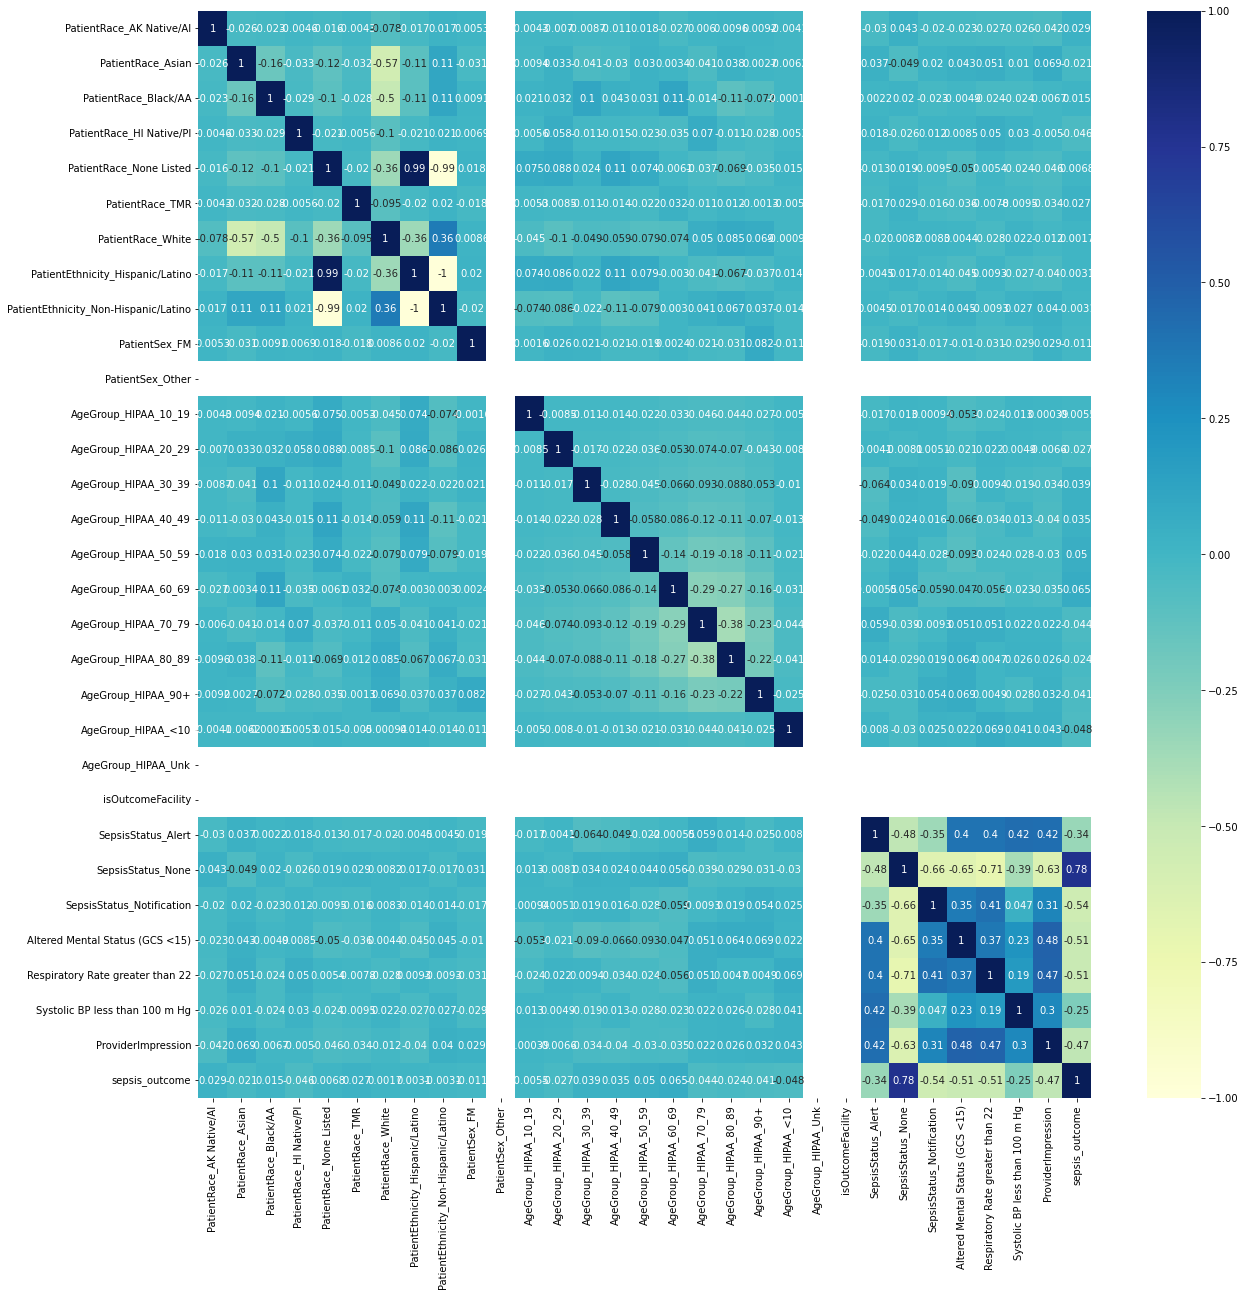

In [74]:
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#Checking the correlations among attributes.

plt.figure(figsize=(20,20))
sns.heatmap(PdmSEPSIS_Boolean.corr(),cbar=True,annot=True,cmap='YlGnBu') #vmin=0.3, vmax=0.99,

In [75]:
#https://stackoverflow.com/questions/61956336/find-high-correlations-in-a-large-coefficient-matrix
#https://stackoverflow.com/questions/67711552/python-split-pandas-dataframe-by-range-of-values

coeff = PdmSEPSIS_Boolean.corr()

# 0.3 is used for illustration 
# replace with your actual value
thresh_low = 0.3
thresh_high = 1

#mask = coeff.abs().lt(thresh)
# or mask = coeff> thresh
mask = (coeff> thresh_low) & (coeff < thresh_high) 

coeff.where(mask).stack()

# #Remove Diagonol
# corr = PdmSEPSIS_Boolean.corr()
# import numpy as np
# np.fill_diagonal(corr.values, np.nan)
# print(corr)

PatientRace_None Listed               PatientEthnicity_Hispanic/Latino        0.986692
PatientRace_White                     PatientEthnicity_Non-Hispanic/Latino    0.359128
PatientEthnicity_Hispanic/Latino      PatientRace_None Listed                 0.986692
PatientEthnicity_Non-Hispanic/Latino  PatientRace_White                       0.359128
SepsisStatus_Alert                    Altered Mental Status (GCS <15)         0.395133
                                      Respiratory Rate greater than 22        0.397881
                                      Systolic BP less than 100 m Hg          0.424035
                                      ProviderImpression                      0.417495
SepsisStatus_None                     sepsis_outcome                          0.779562
SepsisStatus_Notification             Altered Mental Status (GCS <15)         0.353985
                                      Respiratory Rate greater than 22        0.412466
                                      Provi

Text(0.5, 1.0, 'Correlations between 0.3 and 1.0')

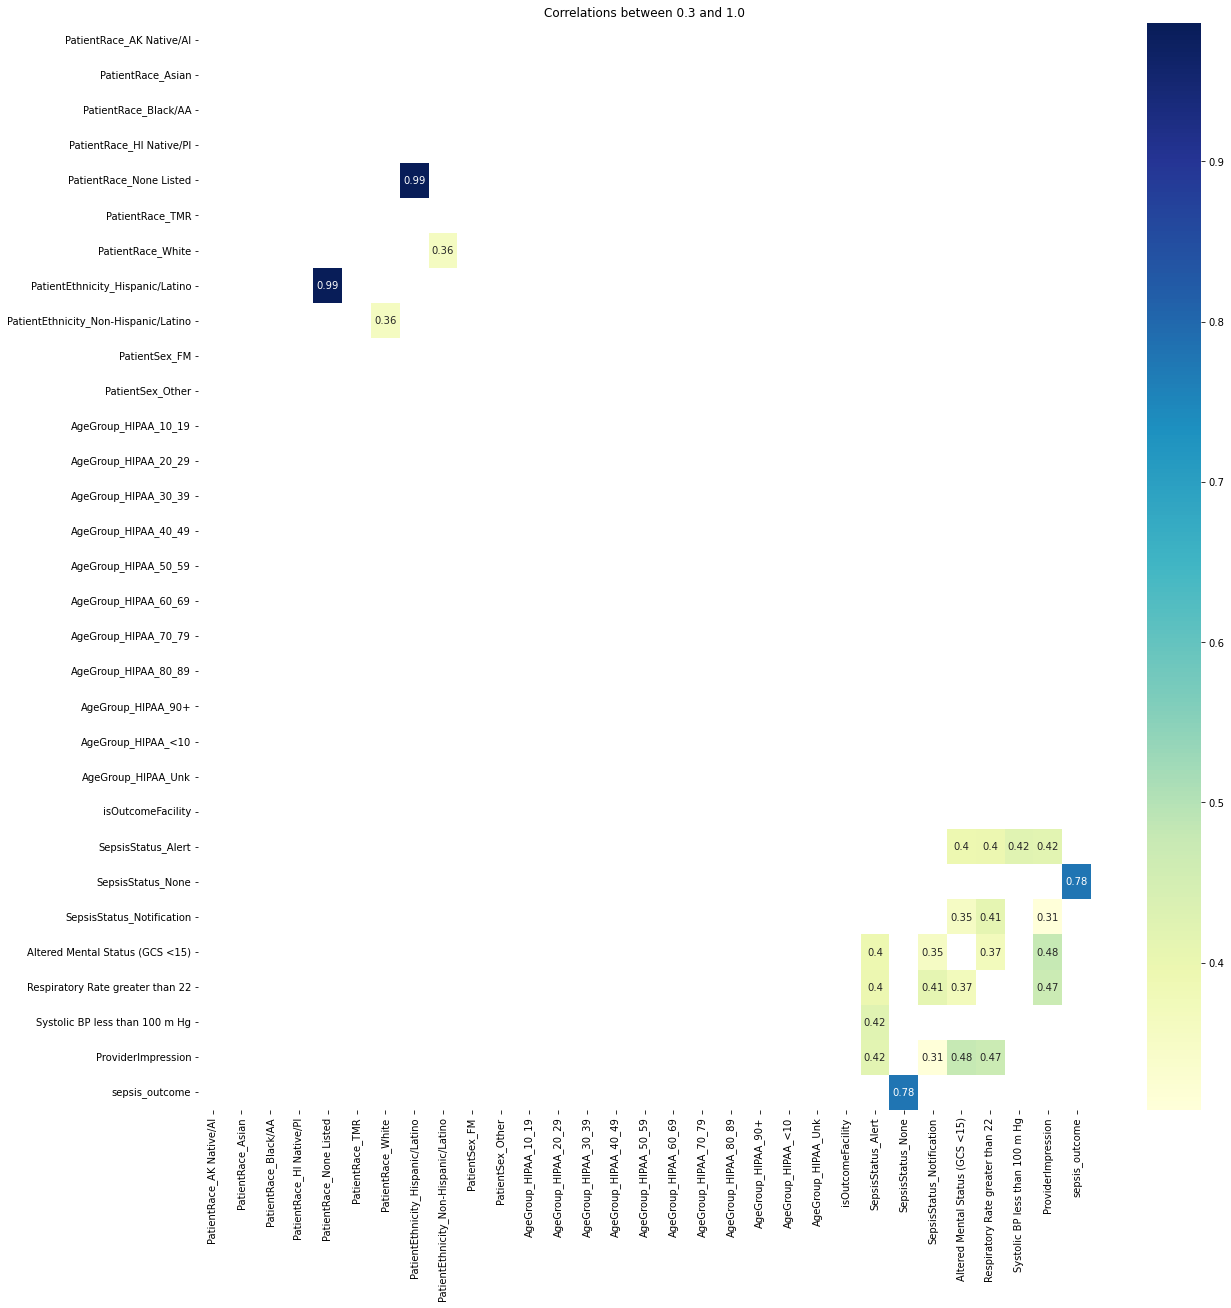

In [76]:
#Plot only the Correlations between 0.3 and 1.0

CorCoeff = coeff.where(mask)

plt.figure(figsize=(20,20))
sns.heatmap(CorCoeff,cbar=True,annot=True,cmap='YlGnBu') #.reshape(26,1)
plt.title('Correlations between 0.3 and 1.0')

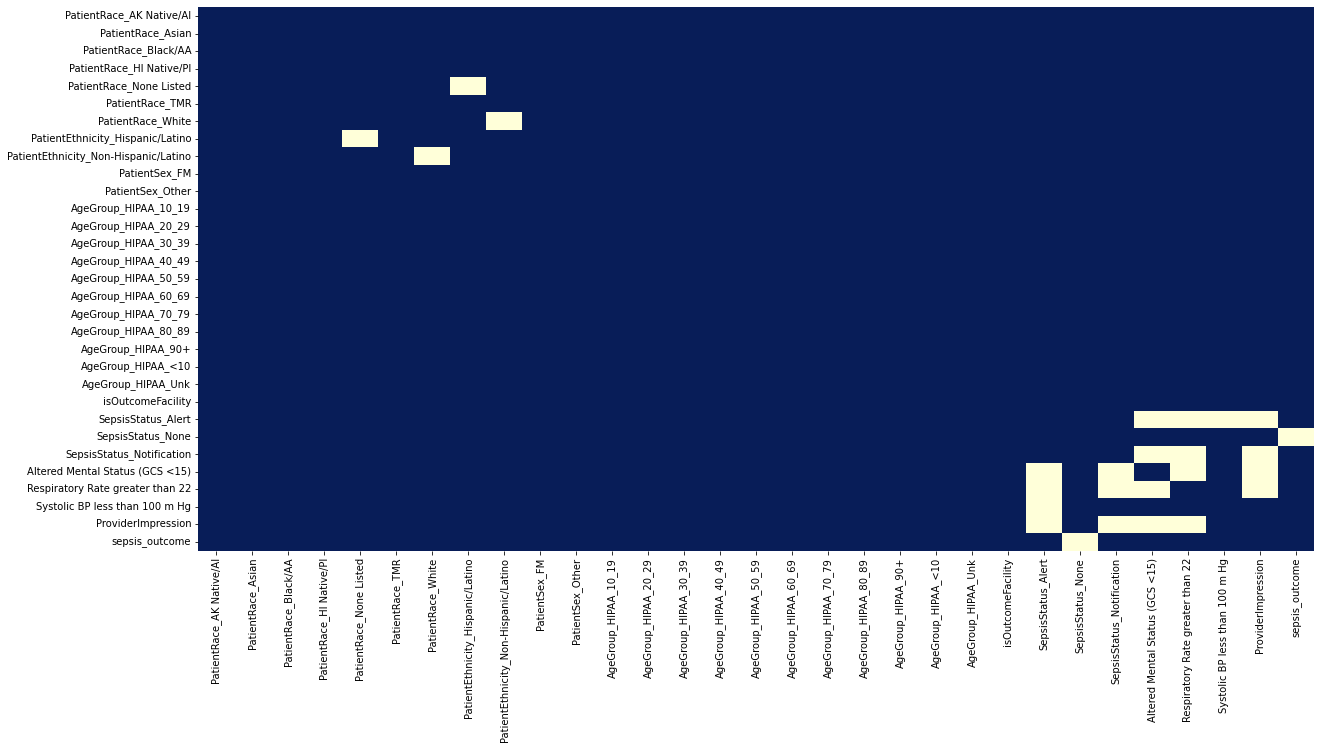

In [77]:
#Heat map of Nans
plt.figure(figsize=(20,10))
sns.heatmap(CorCoeff.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

In [78]:
#Lets drop irrelavant  columns:
# PdmSEPSIS_Boolean.drop(['Accuracy','Triage'],axis =1,  inplace =True)
print(PdmSEPSIS_Boolean.head(3))
print("\n info: ", PdmSEPSIS_Boolean.info())


   PatientRace_AK Native/AI  PatientRace_Asian  PatientRace_Black/AA  \
0                         0                  1                     0   
1                         0                  0                     0   
3                         0                  1                     0   

   PatientRace_HI Native/PI  PatientRace_None Listed  PatientRace_TMR  \
0                         0                        0                0   
1                         0                        0                0   
3                         0                        0                0   

   PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                  0                                 0   
1                  1                                 0   
3                  0                                 0   

   PatientEthnicity_Non-Hispanic/Latino  PatientSex_FM  ...  \
0                                     1              1  ...   
1                                     1              0  ...

Prepare Data Set for Training

In [79]:
#Now you have to take off the Response column into y
import pandas as pd     # manipulate dataframe
import seaborn as sns   # visualization of classification

from sklearn.model_selection import train_test_split   # to split the data
from sklearn.linear_model import LogisticRegression    # to bring logistic regression
from sklearn.tree import DecisionTreeClassifier        # to bring decision tree
from sklearn.ensemble import RandomForestClassifier    # to bring random forest
from sklearn.model_selection import GridSearchCV       # to find best hyper parameters

from sklearn import metrics                            # to create confusion matrix

X = PdmSEPSIS_Boolean.drop('sepsis_outcome',axis=1)
y = PdmSEPSIS_Boolean['sepsis_outcome']

In [80]:
print ("\n Xhead: ",X.head(3))
print ("\n yhead: ",y.head(3))       


 Xhead:     PatientRace_AK Native/AI  PatientRace_Asian  PatientRace_Black/AA  \
0                         0                  1                     0   
1                         0                  0                     0   
3                         0                  1                     0   

   PatientRace_HI Native/PI  PatientRace_None Listed  PatientRace_TMR  \
0                         0                        0                0   
1                         0                        0                0   
3                         0                        0                0   

   PatientRace_White  PatientEthnicity_Hispanic/Latino  \
0                  0                                 0   
1                  1                                 0   
3                  0                                 0   

   PatientEthnicity_Non-Hispanic/Latino  PatientSex_FM  ...  \
0                                     1              1  ...   
1                                     1          

In [81]:
#And then we are going to split this X and y into train and test data.
#https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1357)

# Logistic Regression 


In [82]:
#https://www.analyticsvidhya.com/blog/2017/08/skilltest-logistic-regression/
#Yes, we can apply logistic regression on 3 classification problem, We can use One Vs all method for 3 class classification in logistic regression.
#https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

LR = LogisticRegression()    # Bring empty logistic regression model

In [83]:
#Logistic regression uses maximum likely hood estimate for training a logistic regression.

LR.fit(x_train,y_train)      # Train the model with training data

LogisticRegression()

In [84]:
y_pred_LR = LR.predict(x_test)    # Get predicted y from the logistic regression model

In [85]:
# Get the classification accuracy, Recall, and Presicion with the metrics function.
LR_accuracy = metrics.accuracy_score(y_pred_LR,y_test)
print('Classification accuracy = ',LR_accuracy)
print('Recall = ',metrics.recall_score(y_test, y_pred_LR, average='weighted')) #average='macro' #average='micro' #average='weighted'
print('Precision = ',metrics.precision_score(y_test, y_pred_LR, average='weighted')) #average='macro' #average='micro' #average='weighted'

Classification accuracy =  0.9001956947162426
Recall =  0.9001956947162426
Precision =  0.9165223445144138


In [86]:
#Check the class lable distribution
ytrain = pd.DataFrame(y_train)

Class_Distribution = pd.DataFrame(ytrain['sepsis_outcome'].value_counts())
Class_Distribution['Percentages'] = (Class_Distribution['sepsis_outcome']/Class_Distribution['sepsis_outcome'].sum())*100
Class_Distribution



,sepsis_outcome,Percentages
1,715,60.033585
0,476,39.966415


# Support Vector Machine

In [87]:
#https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
#SVM 

#Import Library
from sklearn import svm
import numpy as np


X=x_train

y=y_train

model = svm.SVC() 
model.fit(X, y)
model.score(X, y)

0.8656591099916037

In [88]:
#predict 
print("\n predicted:\n\n", model.predict(x_test))
# get support vectors
print("\n support_vectors:\n\n",model.support_vectors_)
# get indices of support vectors
print("\n support:\n\n",model.support_)


 predicted:

 [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1
 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 1

In [89]:
##Multi-class classification
#https://www.baeldung.com/cs/svm-multiclass-classification#:~:text=SVM%20Multiclass%20Classification%20in%20Python&text=We%20developed%20two%20different%20classifiers,on%20the%20same%20data%20set.
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



#create two different classifiers, Polynomial kernel, and another one with RBF kernel
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)

#calculate the efficiency of the two models

poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)

#calculate the accuracy and f1 scores for SVM with Polynomial kernel

poly_accuracy = accuracy_score(y_test, poly_pred) #percentage of the true positive and true negative to all data points
poly_f1 = f1_score(y_test, poly_pred, average='weighted') #harmonic mean between precision and recall, and both depend on the false positive and false negative
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

#accuracy and f1 scores for SVM with RBF kernel:
rbf_accuracy = accuracy_score(y_test, rbf_pred) #percentage of the true positive and true negative to all data points
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted') #harmonic mean between precision and recall, and both depend on the false positive and false negative
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

#SVM hyperparameters, like C, gamma, and degree 
#f1 score when the data set isn’t balanced



Accuracy (Polynomial Kernel):  89.43
F1 (Polynomial Kernel):  89.49
Accuracy (RBF Kernel):  89.24
F1 (RBF Kernel):  89.29


In [90]:
# get number of support vectors for each class
model.n_support_

array([248, 194])

# DECISION TREE

In [91]:
DTC = DecisionTreeClassifier()    # Bring empty decision tree model
                                  # you can set the name whatever you want. it doesn't need to be "DTC"
    
DTC.fit(x_train,y_train)          # Train the decision tree model with training data

y_pred_DTC = DTC.predict(x_test)  # Get predicted y from the decision tree model

Decision_accuracy = metrics.accuracy_score(y_pred_DTC,y_test)  # Get the classification accuracy
print(Decision_accuracy)

0.8454011741682974


GRID SEARCH METHOD

In [92]:
grid_DTC = DecisionTreeClassifier()    # Bring empty decision tree

# Prepare the combination of parameters.
param_dist={"criterion":["gini","entropy"],       # 2 options for criterion
            'max_depth': range(2,8),              # 6 options for max_depth
            'max_leaf_nodes': range(50,150,50)}   # 2 options for max_leaf_nodes
# So, the total number of combination is 2*6*2 = 24

# cv means cross validation and this concept will come in the future
grid_DTC = GridSearchCV(grid_DTC, param_grid= param_dist, cv=5, n_jobs=-1)   
#Number of jobs to run in parallel.  -1 means using all processors. 

grid_DTC.fit(x_train, y_train)     # Fit all of the 24 combinations


best_parameters = grid_DTC.best_params_   # Get best parameters 
print(best_parameters)

# Create a decision tree with best parameters and train it with whole train data
after_grid_DTC = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, max_leaf_nodes= 50, random_state= 1357)
after_grid_DTC = after_grid_DTC.fit(x_train, y_train)

y_pred_grid = after_grid_DTC.predict(x_test)     # Get predicted y from the decision tree model

Decision_accuracy = metrics.accuracy_score(y_pred_grid,y_test)
print(Decision_accuracy)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 50}
0.8688845401174168


# RANDOM FOREST

In [93]:
RF = RandomForestClassifier(100,n_jobs=-1,random_state=1357)   # Bring empty random forest model, 100 is the number of trees in the RF
RF.fit(x_train,y_train)   # Train the model with training data

y_pred_RF = RF.predict(x_test)   # Get predicted y from the random forest model

# Get the classification accuracy, Recall, and Presicion with the metrics function.
print('Accucary = ',metrics.accuracy_score(y_pred_RF,y_test))
print('Recall = ',metrics.recall_score(y_test, y_pred_RF, average='weighted'))#average='macro' #average='micro' #average='weighted'
print('Precision = ',metrics.precision_score(y_test, y_pred_RF, average='weighted'))#average='macro' #average='micro' #average='weighted'

Accucary =  0.8708414872798435
Recall =  0.8708414872798435
Precision =  0.8782475635395607


Visualize the confusion metrics

<AxesSubplot:>

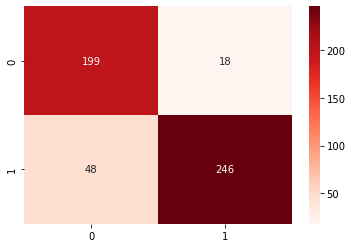

In [94]:
cm = metrics.confusion_matrix(y_test, y_pred_RF)    # Create a confusion matrix from your predicted y and original y value.
                                                    # In this code, we use the result of random forest, but you can replace with another classifier

sns.heatmap(cm,annot=True,cmap='Reds',fmt='.0f')    # Bring heatmap from the seaborn and fit our confusion matrix
                                                    # annot = True can shows the confusion matrix values
                                                    # camp can decide the color of heatmap
                                                    # fmt can decide the type of presentation of confusion matrix values